In [58]:
# KNN can be used for classification also regression

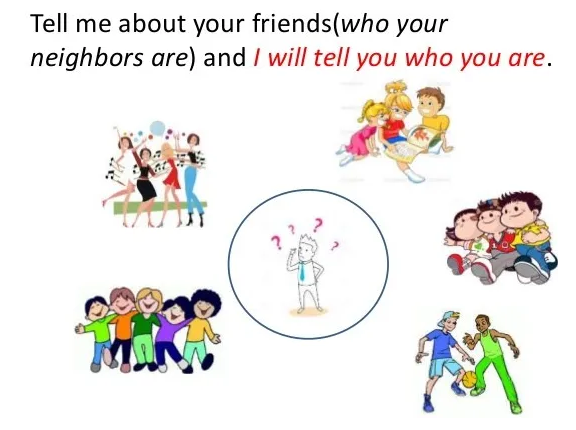

1. [Machine Learning K-Nearest Neighbors (kNN) Algorithm in Python](https://blog.quantinsti.com/machine-learning-k-nearest-neighbors-knn-algorithm-python/)
2. [Nearest Neighbors Classification](https://www.kdnuggets.com/2022/04/nearest-neighbors-classification.html)
3. [Distance Metrics: Euclidean, Manhattan, and Minkowski](https://www.kdnuggets.com/2023/03/distance-metrics-euclidean-manhattan-minkowski-oh.html)
4. [Day 3: K-Nearest Neighbors and Bias-Variance Tradeoff](https://medium.com/30-days-of-machine-learning/day-3-k-nearest-neighbors-and-bias-variance-tradeoff-75f84d515bdb)
5. [IBM: kNN](https://www.ibm.com/topics/knn)
6. [YouTube: K-Nearest Neighbors Algorithm (kNN)](https://www.youtube.com/watch?v=zeFt_JCA3b4)
7. [YouTube: kNN Explained](https://www.youtube.com/watch?v=v5CcxPiYSlA)
8. [YouTube: kNN in Python](https://www.youtube.com/watch?v=HVXime0nQeI&t=1s)
9. [YouTube: kNN Classification Example](https://www.youtube.com/watch?v=CMtpzNJbbWQ)
10. [YouTube: KNN in Machine Learning](https://www.youtube.com/watch?v=UqYde-LULfs)
11. [YouTube: KNN Algorithm - Machine Learning](https://www.youtube.com/watch?v=4HKqjENq9OU)

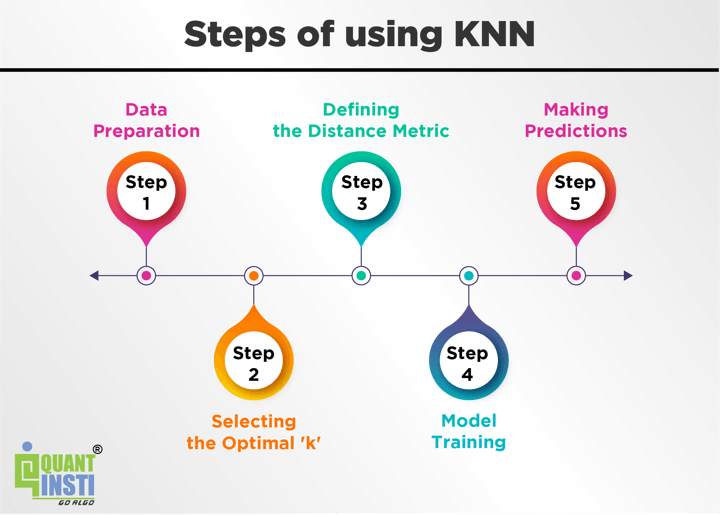

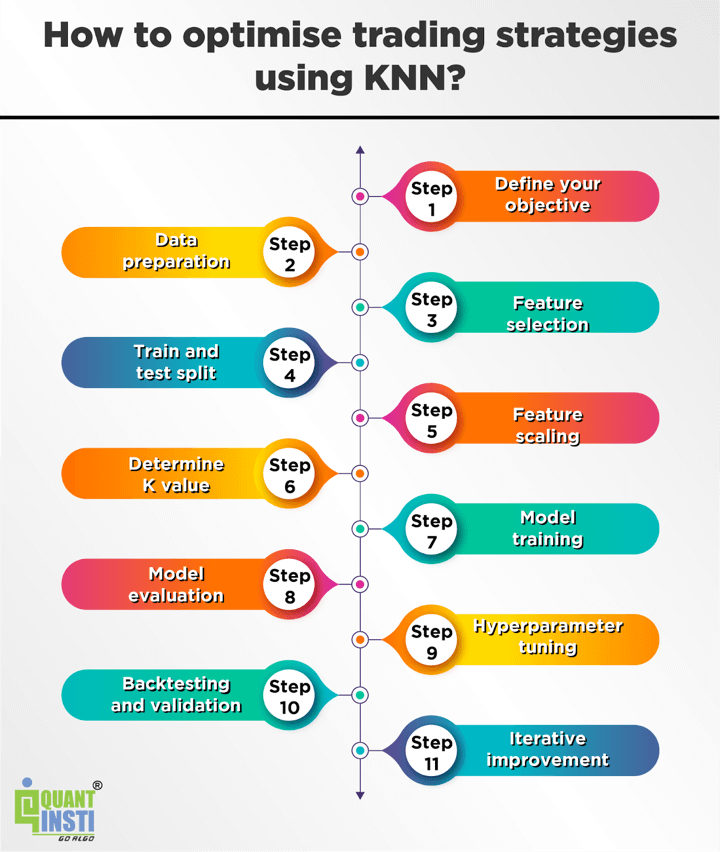

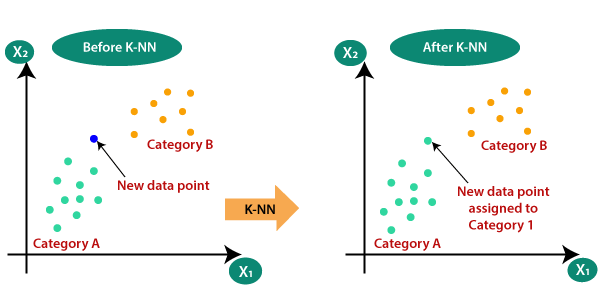

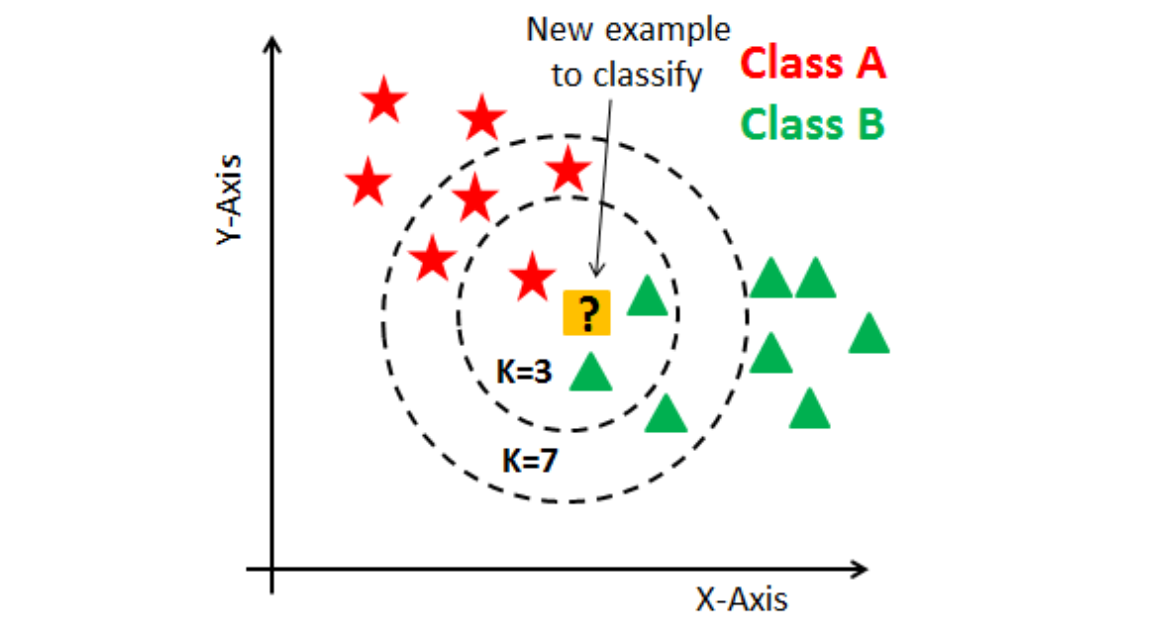

In [59]:
# Based on the number of close neighbors we are making prediction. 
# Its not learning at all, it does not perform the the fit operation,
# it just calculates the distance between points and makes prediction 
# It doesnt have a formula, the prediction only based on distance calculation 


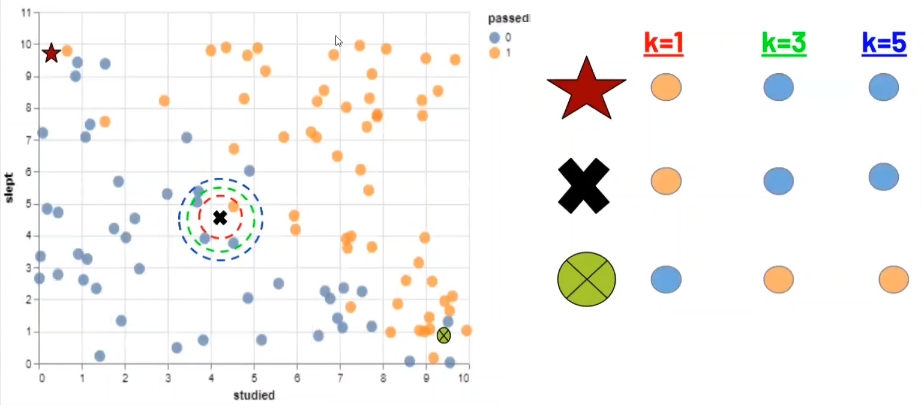

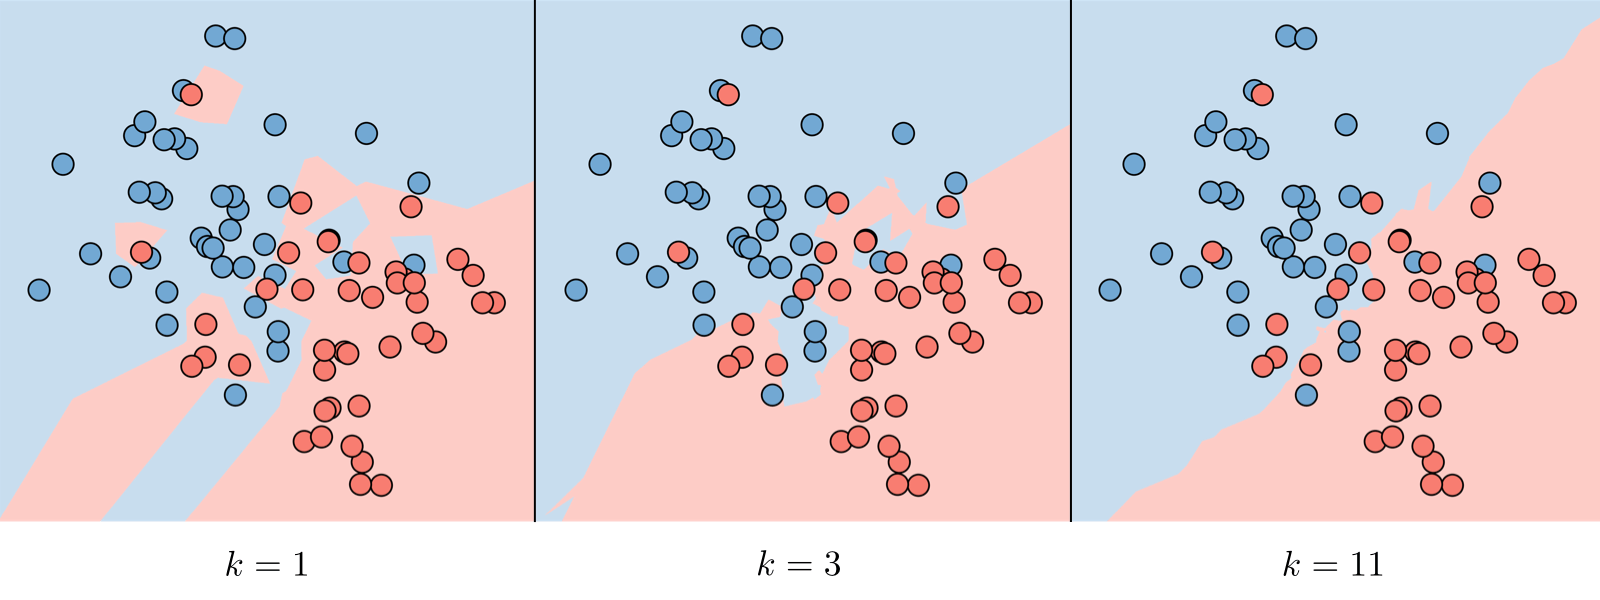

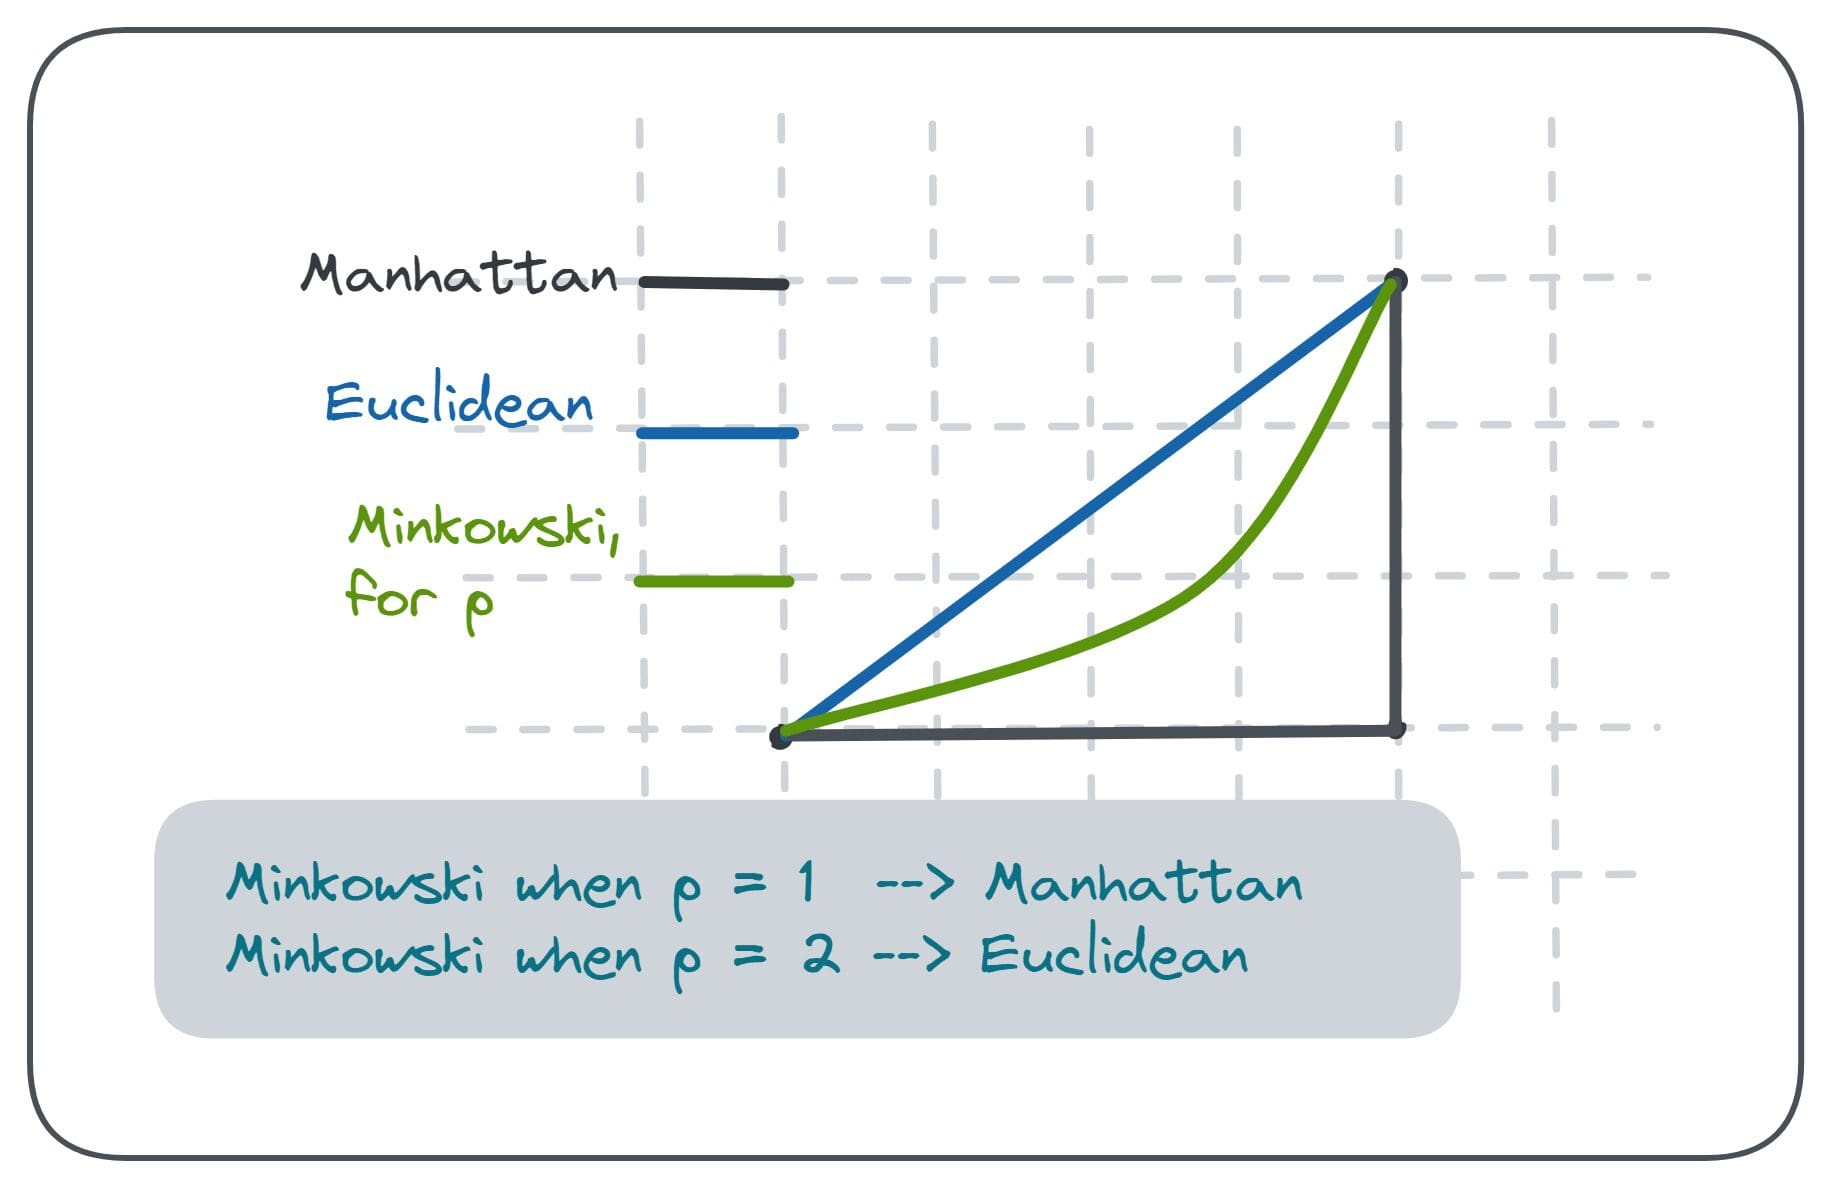

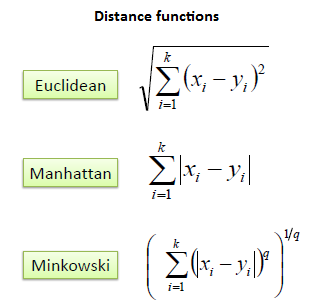

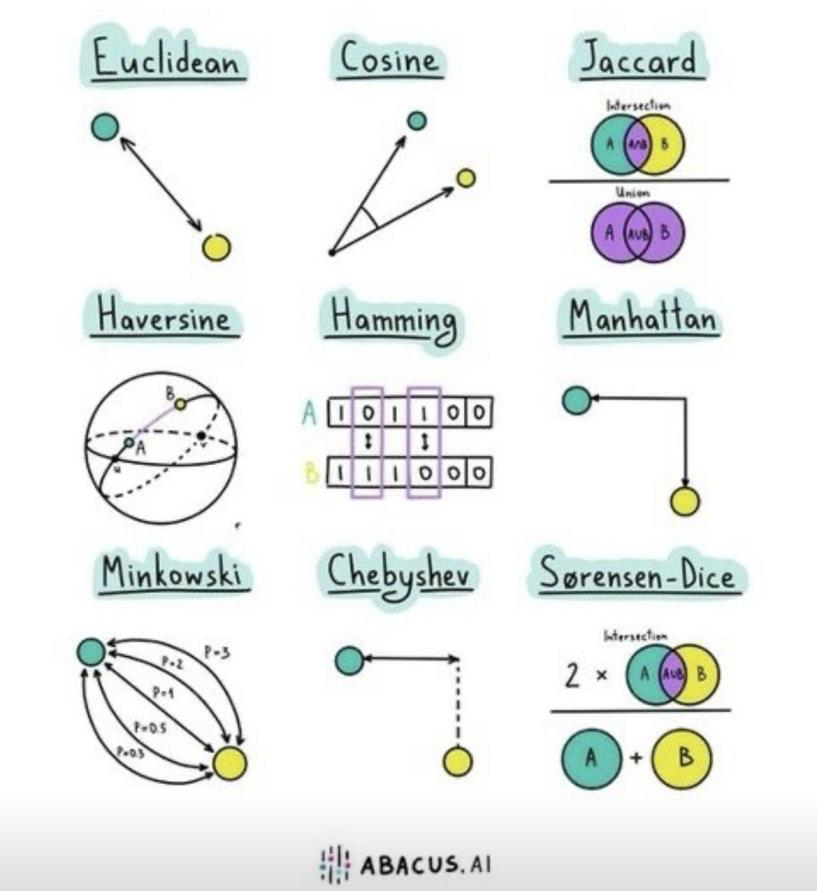

**K-Nearest Neighbors (KNN) Algorithm**

k-Nearest Neighbors (KNN) is one of the simplest and most intuitive machine learning algorithms used for both classification and regression tasks. Despite its simplicity, KNN can be quite effective in various scenarios. Here is a detailed explanation of KNN:
**
**Overview**
KNN is a non-parametric, instance-based learning algorithm. Unlike other supervised learning algorithms, KNN does not involve a training phase where a model is explicitly built. Instead, the algorithm relies directly on the entire dataset, making it a type of lazy learning.

**How KNN Works**
The core idea of KNN is to identify the 'k' nearest neighbors to a new, unknown data point, and then make predictions based on these neighbors. Here’s how it works:

1. **Distance Measurement**:
   - When a new data point needs to be classified or a value needs to be predicted, KNN calculates the distance between this point and all other points in the training dataset. Common distance metrics include Euclidean, Manhattan, and Minkowski distances.

2. **Neighbor Selection**:
   - The algorithm selects the 'k' nearest neighbors based on the calculated distances. The value of 'k' is a user-defined parameter and typically an odd number to avoid ties.

3. **Prediction**:
   - **Classification**: The new data point is assigned to the class that is most common among its 'k' nearest neighbors. This is done using a majority voting system.
   - **Regression**: The value of the new data point is predicted by averaging the values of its 'k' nearest neighbors.

**Characteristics of KNN**
- **Lazy Learning**: KNN does not involve a training phase. Instead, it memorizes the training dataset, and all computations are deferred until a prediction is needed.
- **Non-Parametric**: KNN does not assume any specific form for the underlying data distribution. It makes predictions based solely on the similarity of data points.
- **Simple and Intuitive**: The concept of finding the nearest neighbors is easy to understand and implement.
- **Computationally Intensive**: Since KNN involves calculating distances for all data points, it can be slow and inefficient for large datasets.

**Choosing the Value of 'k'**
- The performance of KNN largely depends on the choice of 'k'.
- **Small 'k'**: A small value of 'k' can lead to a model that is sensitive to noise in the data.
- **Large 'k'**: A large value of 'k' can smooth out noise but may also blur the distinctions between different classes.

**Advantages**
- **No Training Phase**: Eliminates the need for a training phase, making it quick to set up.
- **Adaptable**: Can be used for both classification and regression.
- **Versatile**: Effective for a wide range of problems if distance metric and 'k' value are chosen appropriately.

**Disadvantages**
- **Computational Cost**: High computational cost during prediction as it involves calculating distances for all data points.
- **Storage Requirements**: Requires storing the entire training dataset.
- **Sensitivity to Irrelevant Features**: Performance can degrade if the dataset has many irrelevant or redundant features.

**Practical Applications**
- **Recommendation Systems**: Used to recommend items based on user similarity.
- **Pattern Recognition**: Applied in image and speech recognition.
- **Medical Diagnosis**: Helps in classifying patients into different categories based on historical medical data.

# Exploratory Data Analysis and Visualization

**Cancer Prediction Model**

**Gene Expression Dataset**

This dataset contains information about the expression levels of two genes and the presence of cancer.

**Columns:**
- **Gene One**: Expression level of the first gene.
- **Gene Two**: Expression level of the second gene.
- **Cancer Present**: Indicates the presence (1) or absence (0) of cancer.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, recall_score, precision_score

plt.rcParams["figure.figsize"] = (10, 6)

import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [61]:
df = pd.read_csv("gene_expression.csv")
df.head()

Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [63]:
df.describe().T

count      mean       std  min  25%  50%  75%   max
Gene One        3000.0  5.600133  1.828388  1.0  4.3  5.6  6.9  10.0
Gene Two        3000.0  5.410467  1.729081  1.0  4.0  5.4  6.7  10.0
Cancer Present  3000.0  0.500000  0.500083  0.0  0.0  0.5  1.0   1.0

In [64]:
df["Cancer Present"].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

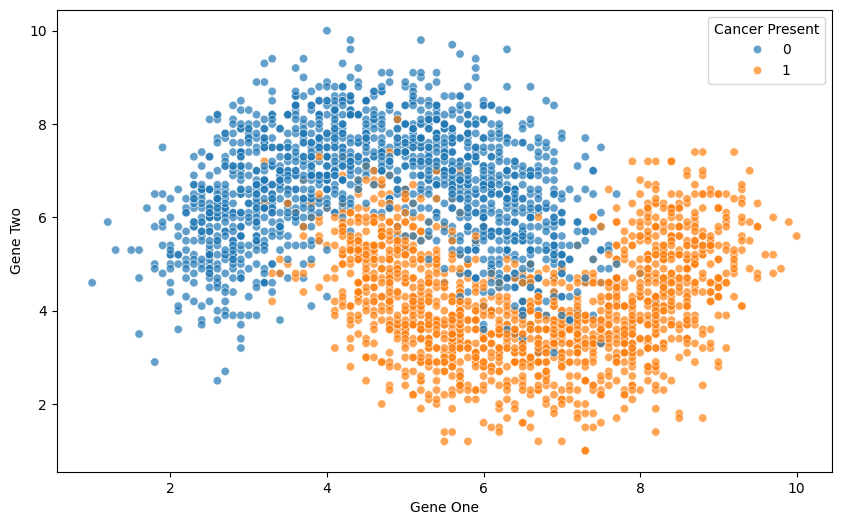

In [65]:
sns.scatterplot(x = "Gene One", y = "Gene Two", hue = "Cancer Present", data = df, alpha = 0.7);

# KNN algorithms yield better results with well-separated data. 
# They perform poorly with mixed data. 
# In this specific dataset, most errors will occur at boundary observations, where the data is mixed.

(4.0, 8.0)

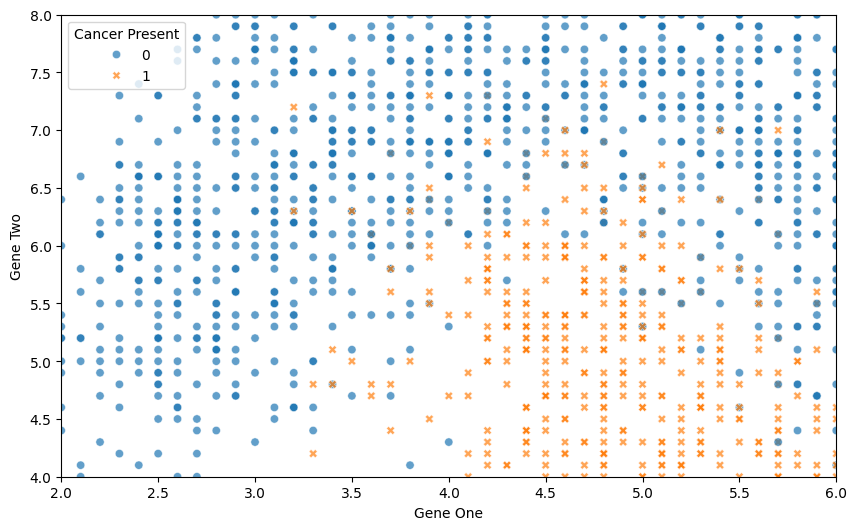

In [66]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df, alpha=0.7, style= "Cancer Present")
plt.xlim(2,6)
plt.ylim(4,8)

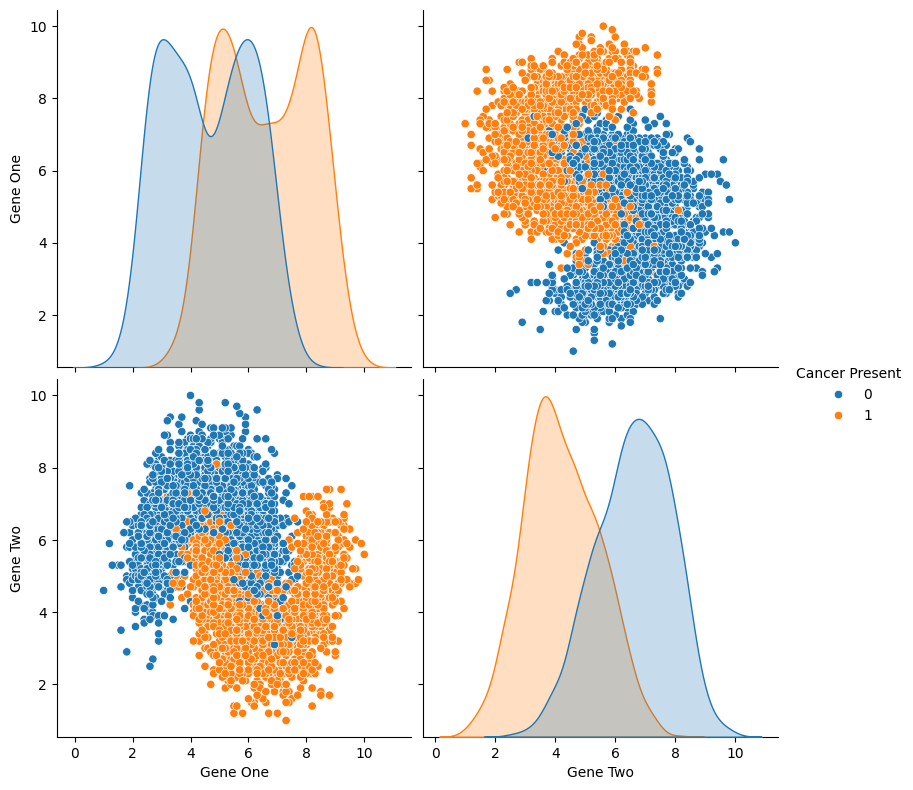

In [67]:
sns.pairplot(data = df, hue = "Cancer Present", height = 4, aspect = 1);

# For Gene one feature, the two classes appear to be almost 50% intertwined. 
# For Gene two feature, the two classes appear to be almost 25% intertwined.
# We can say that the Gene two feature is a more distinctive and important feature.

# However, 2D visualizations can be misleading. 
# We should verify the insights obtained here with a Boxplot.

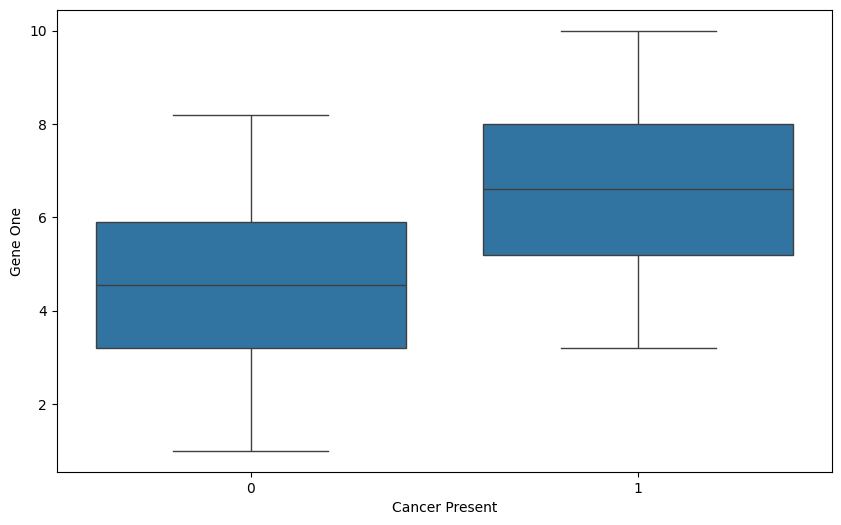

In [68]:
sns.boxplot(x = "Cancer Present", y = "Gene One", data = df);

# As Gene One increases, the risk of cancer increases.
# We can also gain the insights from the pairplot here.
# Specifically for Gene One, the two classes overlap more with each other compared to Gene Two.

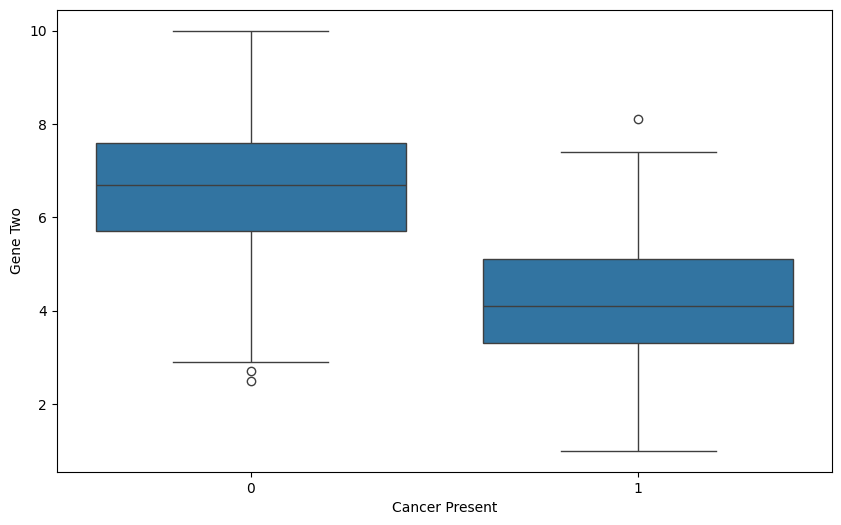

In [69]:
sns.boxplot(x = "Cancer Present", y = "Gene Two", data = df);

# As Gene Two decreases, the risk of cancer increases.
# We can also gain the insights from the pairplot here.
# Specifically for Gene Two, the two classes overlap less with each other compared to Gene One.

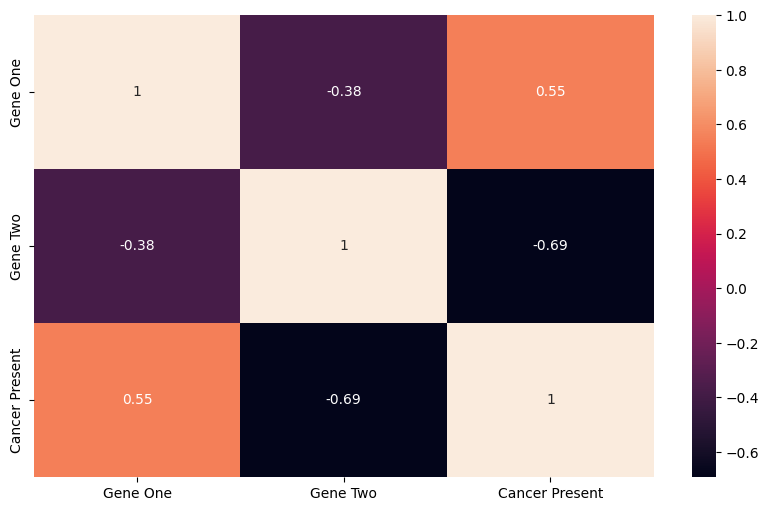

In [70]:
sns.heatmap(df.corr(), annot = True); 

# In patients with Gene 1 expression, the cancer risk is high, whereas the risk decreases in those with Gene 2 expression.
# We can see the insights derived from the boxplots here as well.

# Modellling

## Train|Test Split

In [71]:
X = df.drop("Cancer Present", axis = 1)
y = df["Cancer Present"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
# My data is balanced so we dont use stratify, we can directly split the data 
# Whole training is based on distance calculation 

## Model Building

In [74]:
# https://blog.dailydoseofds.com/

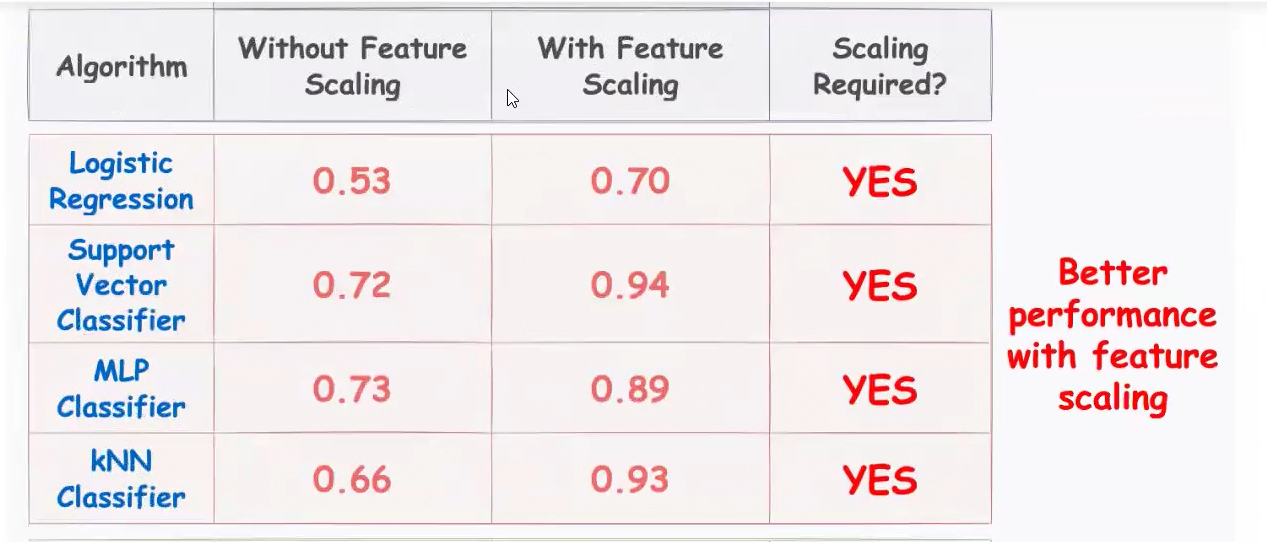

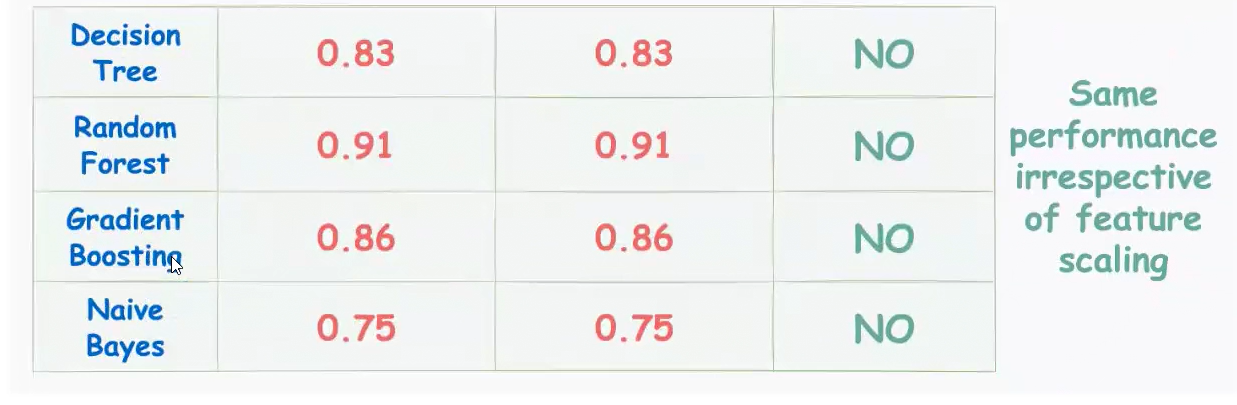

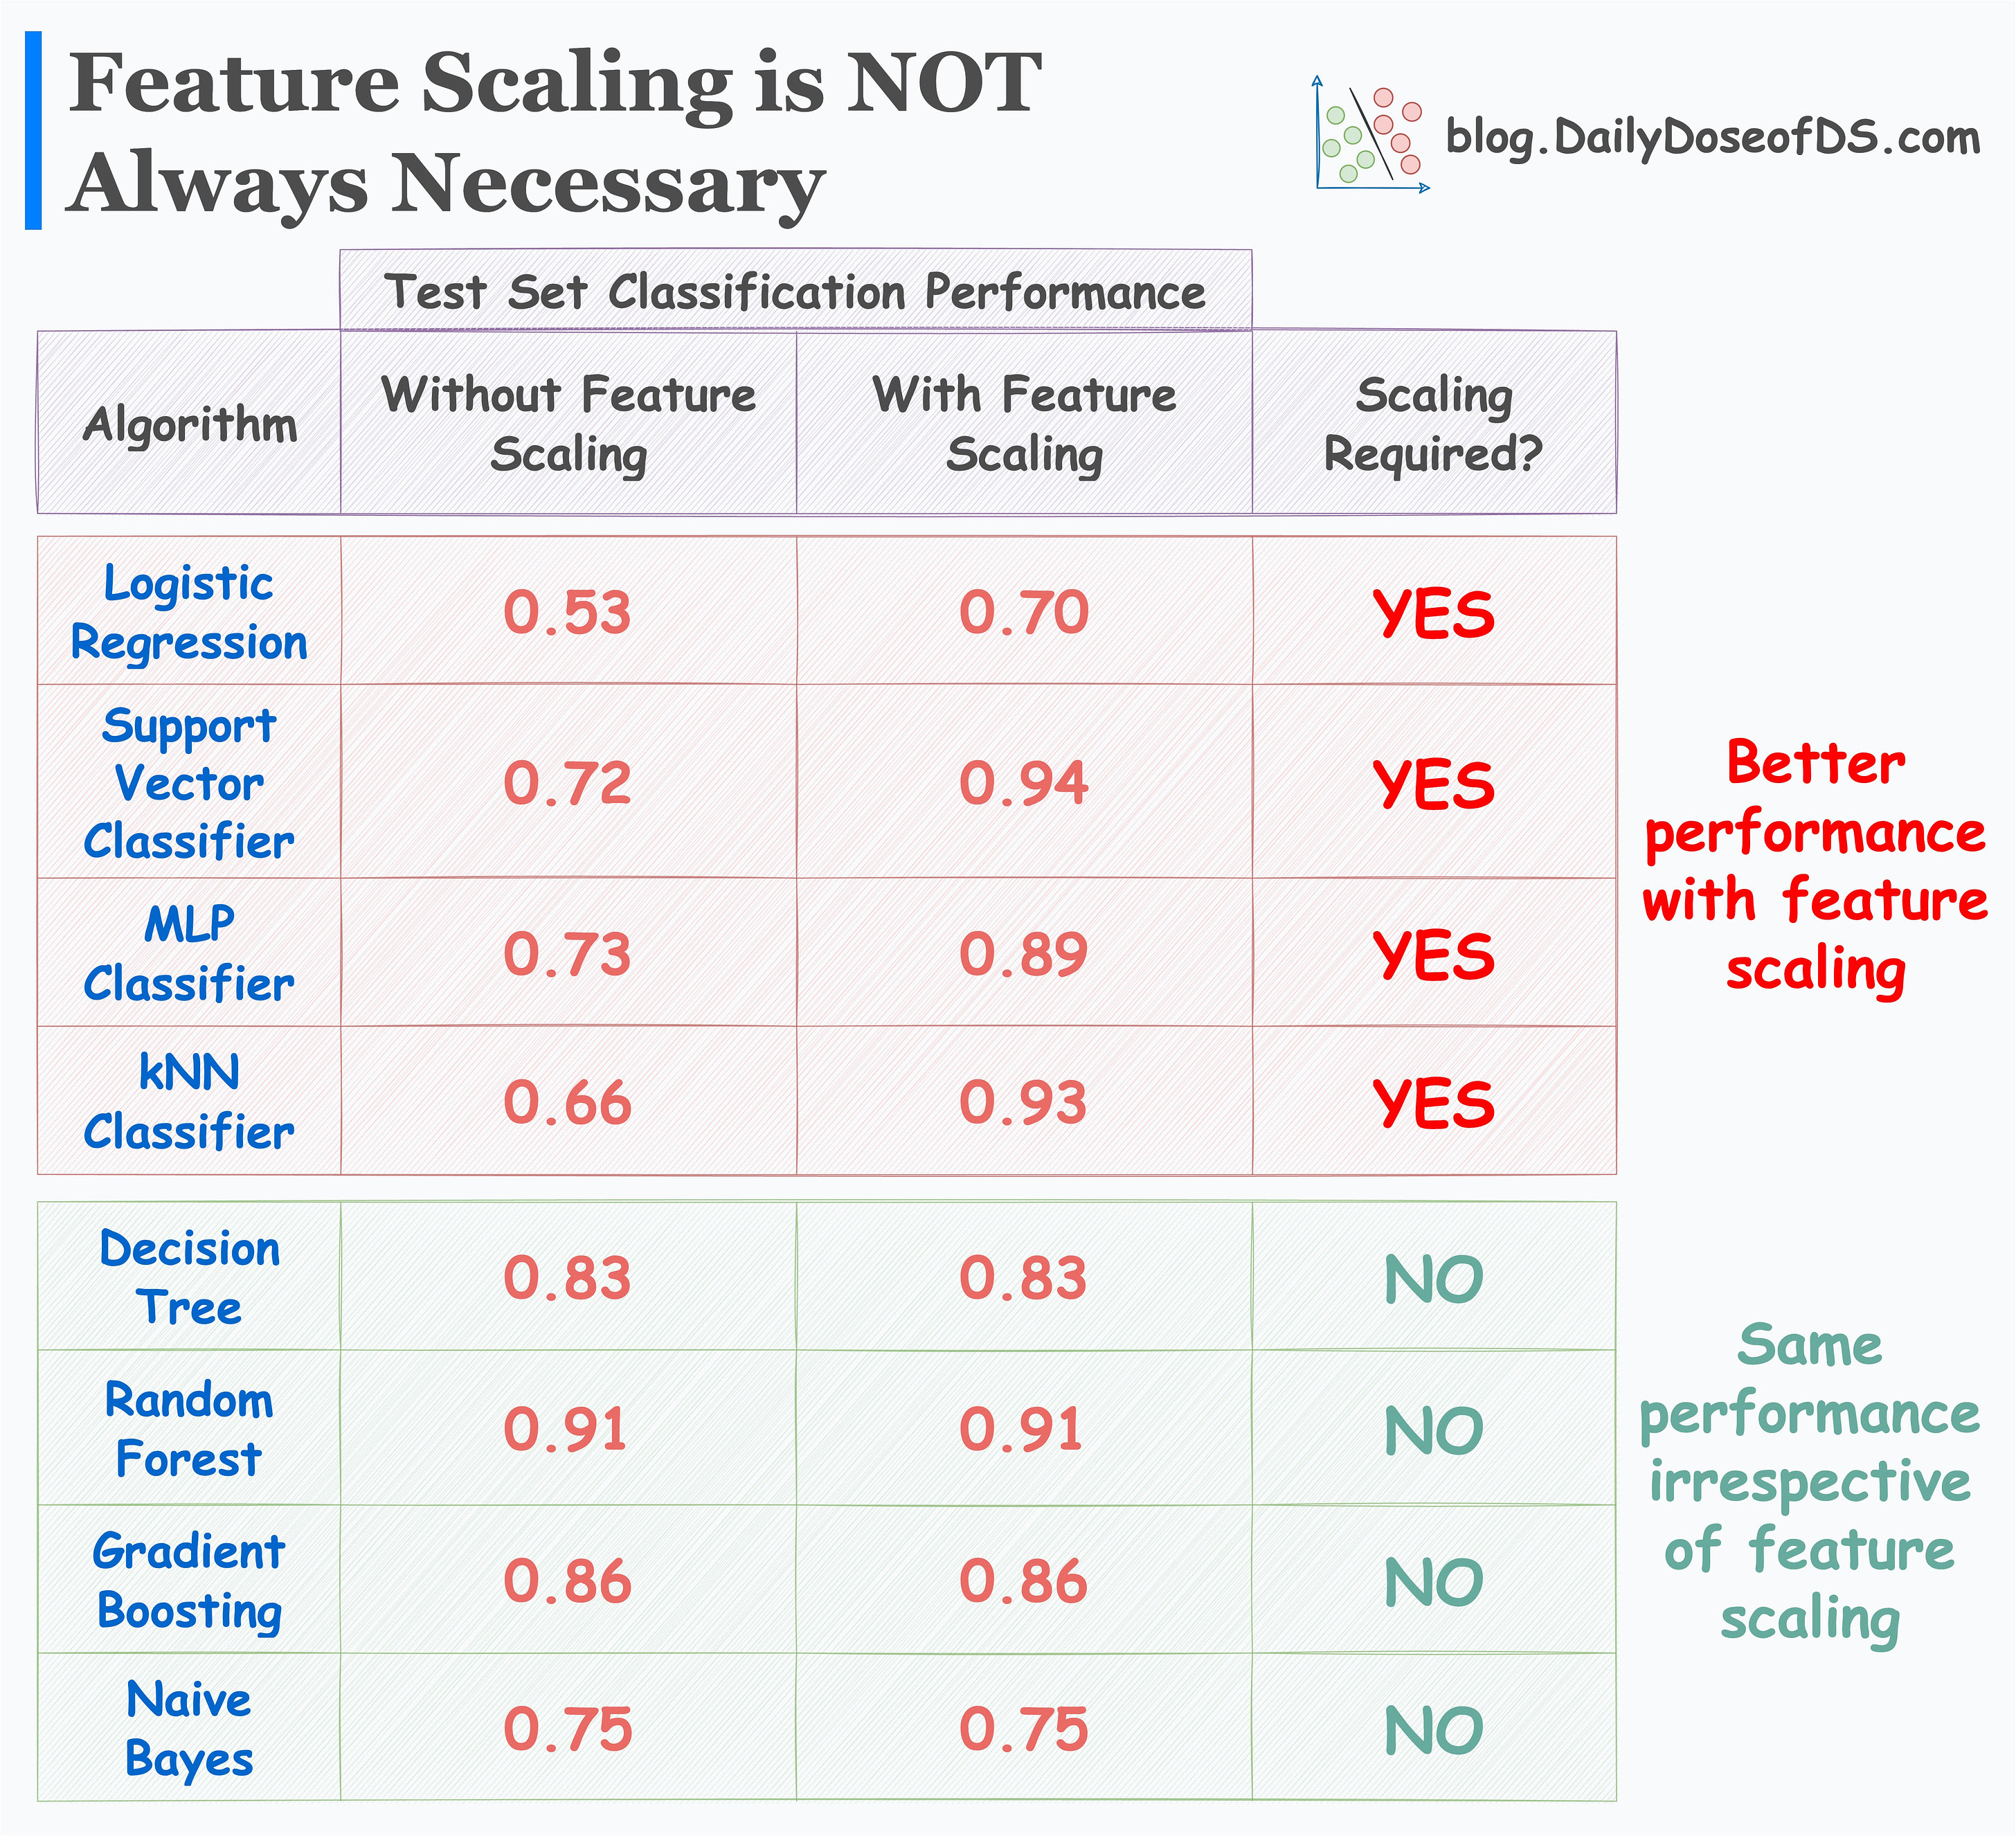

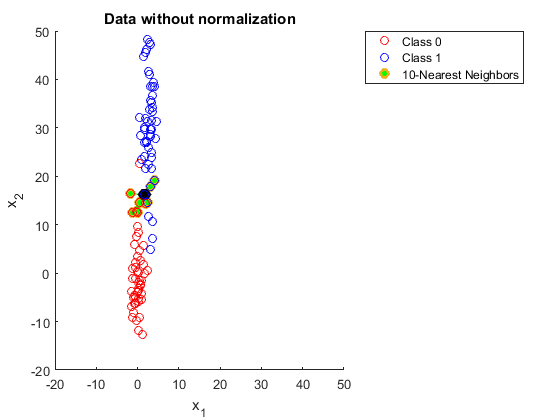

In [75]:
# its hard to calculate the distances

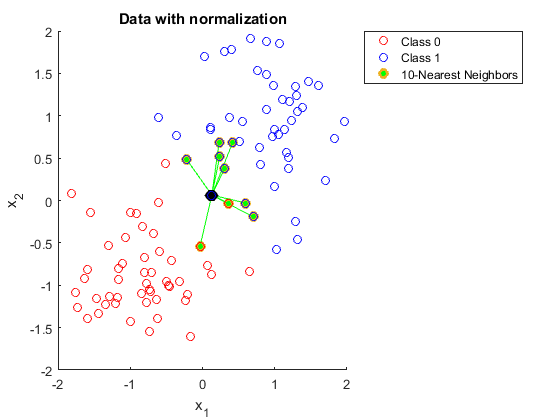

In [76]:
# after scaling its easier 

[Why do you need to scale data in kNN?](https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn)

In [77]:
# 1 - 10 , 1000000 minmax scaler 
# 

**Importance of Scaling in k-Nearest Neighbors (kNN) Algorithm**

The kNN algorithm relies on **distance metrics** between samples. The range of values for **features** plays a crucial role in these distance calculations.

**Why is Scaling Important?**

1. **Equal Contribution of Features**: Different features often have different value ranges. For example, age might range from 0 to 100, while income might range from 0 to 10,000. **Scaling** ensures that all features contribute equally to the distance calculations.
2. **Faster Convergence**: Scaling can help the algorithm work faster and more efficiently.
3. **Better Performance**: Appropriate scaling can improve the overall performance of the model.

**Scaling Methods**

- **Min-Max Scaling**: Suitable for data with large scale differences.
- **Z-Score Normalization (StandardScaler)**: Ideal for data close to a normal distribution with few outliers.
- **Robust Scaling**: Can be used to reduce the influence of outliers.

**Application Recommendations**

- **Choice Based on Dataset Structure**: If there are large differences in the values of features, Min-Max Scaling may be preferred. Otherwise, Z-Score Scaling might be more appropriate.
- **Distribution and Outliers**: For normally distributed data with few outliers, Z-Score is preferred; otherwise, Min-Max might be more suitable.
- **Categorical Data**: For categorical data without order, Min-Max Scaling may not be meaningful.
- **Model Dependence**: In distance-based models, scaling of features is important.

**Final Note**

Scaling is crucial for distance-based algorithms like kNN. Choosing the correct scaling method can increase the accuracy and stability of the algorithm.

**Application and Importance of Data Scaling**

- **Determining the Optimal Scaling Method Through Experimentation**: It is beneficial to determine the most appropriate **scaling method** by experimenting based on the characteristics of the dataset and the problem.

- **Scale of Data and Range of Feature Values**:
  - For features with large value differences, **Min-Max Scaling** is suitable.
  - When there is no significant scale difference between values, **Z-Score Scaling** (**StandardScaler**) may be more appropriate.
  - **Example Application**:
    - Feature 1 has values ranging from 0 to 100, while Feature 2 ranges from -1 to 1. In this case, **Z-Score Scaling** may be preferred.

- **Distribution and Outliers**:
  - **Z-Score Scaling** (**StandardScaler**) is suitable for data with a normal distribution and few outliers.
  - For data with imbalanced distribution or many outliers, **Min-Max Scaling** may yield better results.

- **Categorical Data**: For categorical features without an order, **Min-Max Scaling** may not be appropriate.

- **Model Dependence**:
  - The sensitivity of the model to feature scaling is important. For example, the **KNN** model is greatly affected by the scaling of features.

- **Hyperparameter Tuning**:
  - The hyperparameter values of machine learning algorithms may vary depending on the scaling methods used.

**Conclusion**

The choice of which scaling method to use depends on the nature of the dataset, the distribution of features, the characteristics of the model to be used, and hyperparameter tuning.

**Fit Process in the K-Nearest Neighbors (KNN) Algorithm**

The **fit** process of the KNN algorithm adopts a different approach from some other machine learning models. This approach is based on the direct use of the data.

**How Does the Fit Process Work?**

- KNN does not perform residual analysis like logistic regression and does not use sigmoid functions for classification. Similarly, it does not draw a "best fit line" like linear models.
- **Key Difference**: KNN directly uses the coordinates of the existing data points. Each data point is considered a coordinate point.
- **Data Preparation**: During the **fit** process, the algorithm only stores the coordinates of the data points in memory.
- **No Computation**: No computation or model construction occurs at this stage. The main process starts when the `predict` function is called.

**Predict Process**

- The main operation of KNN takes place during the **predict** stage.
- When a new data point arrives, the algorithm determines the nearest neighbors of this point using the coordinates stored in memory during the **fit** phase.
- The result is calculated based on the classes or values of these nearest neighbors.

This approach is one of the reasons why KNN is called a "lazy learner." The model postpones its main operation until the query or prediction stage.

In [78]:
# KNN regressor very rarerly used. 

In [79]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]  #default n_neighbors=5

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

**Predict Process in the K-Nearest Neighbors (KNN) Algorithm**

The **predict** process of the KNN algorithm is the core operational stage of the model. During this process, new data points are evaluated on the previously **fit** model.

**How Does the Predict Process Occur?**

- **Placement of New Data Point**: The new data given to the test model is placed in its position within the dataset.
- **Neighborhood Calculation**: The algorithm calculates the proximity of this new observation to the entire dataset.
- **Selection of Nearest Neighbors**:
  - The **n_neighbors** parameter (e.g., set to 5) is used to determine the closest 5 neighbors.
  - The nearest neighbors are determined based on **uniform** or **distance** weighting.
  - For binary datasets, typically a single neighbor is preferred.
  - In the case of equidistant neighbors, classification is made based on the nearest neighbor.

**Performance and Data Size**

- **High Workload**: KNN has a high computational load because it calculates distances to all data points.
- **Use in Large Datasets**: Due to this high computational load, the KNN algorithm is not preferred for large datasets.

**Application Example**

```python
y_pred = knn_model.predict(X_test)
```

In [80]:
pipe_model.get_params()
# vanilla model, the default model -> 5 knn 

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [81]:
y_pred = pipe_model.predict(X_test)
y_pred
# for each one of these data points, my model calculates the distance between the data point and all the other points 


array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

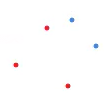

**predict_proba Process in the K-Nearest Neighbors (KNN) Algorithm**

The **predict_proba** function in the KNN algorithm provides the probabilities of the predicted classes. These probabilities help us understand how the classification decision is made.

**How Does the predict_proba Process Work?**

- **Class Distribution of Neighbors**: For example, if a data point has 5 neighbors, and 3 of them belong to class '1' while 2 belong to class '0', **predict_proba** will give a probability of 60% for '1' and 40% for '0'.
- **Classification Decision**: In this case, if **n_neighbors=5** and an odd number of neighbors are used, the model will prefer class '1' with a probability of 60%.

**Effect of the weights Parameter**

1. **uniform**:
   - Each neighbor's vote has equal weight.
   - Distances do not matter; all neighbors are equally influential.

2. **distance**:
   - The votes of neighbors are weighted inversely proportional to their distance from the queried point.
   - Closer neighbors have a greater impact.

**Evaluation Criteria**

- **Noisy Data**: In noisy datasets, the **distance** method can lead to overfitting. In such cases, **uniform** may sometimes provide more stable results.
- **Data Distribution**: In datasets with clustered examples, **distance** can be more meaningful.
- **Data Size**: For large datasets, **uniform** is generally faster; **distance** calculations can be more complex.
- **Cross Validation**: Both options can be tested on different data subsets to determine which method generally yields better results.

In [82]:
# distance -> which ever is closer data point, i will give more points to it. 

#  if data has a lot of outliers, its better to use uniform, , otherwise model gonna make bad preds 

# 

In [83]:
y_pred_proba = pipe_model.predict_proba(X_test)

In [84]:
pd.DataFrame(y_pred_proba)

# Since our model has `weights="uniform"` and the number of neighbors is 5, out of the 5 neighbors around observation 
# 895, 3 belong to class 1 (60%), and 2 belong to class 0 (40%). Therefore, it will assign to class 1 with a 
# 60% probability.

0    1
0    0.0  1.0
1    0.0  1.0
2    0.0  1.0
3    1.0  0.0
4    1.0  0.0
..   ...  ...
895  0.4  0.6
896  1.0  0.0
897  0.0  1.0
898  0.0  1.0
899  1.0  0.0

[900 rows x 2 columns]

In [85]:
# pip install mglearn

In [86]:
import mglearn

**mglearn.plots.plot_knn_classification(n_neighbors=5)**

- This function call, from the **mglearn** library, creates a plot to visualize the decision boundaries of a K-Nearest Neighbors (KNN) classification with the **n_neighbors** value set to 5.

- This plot shows how the KNN algorithm classifies data points based on the majority class of the 5 nearest neighbors.

- The graph helps understand how the algorithm works and how the decision boundaries change when the **n_neighbors** value is altered.

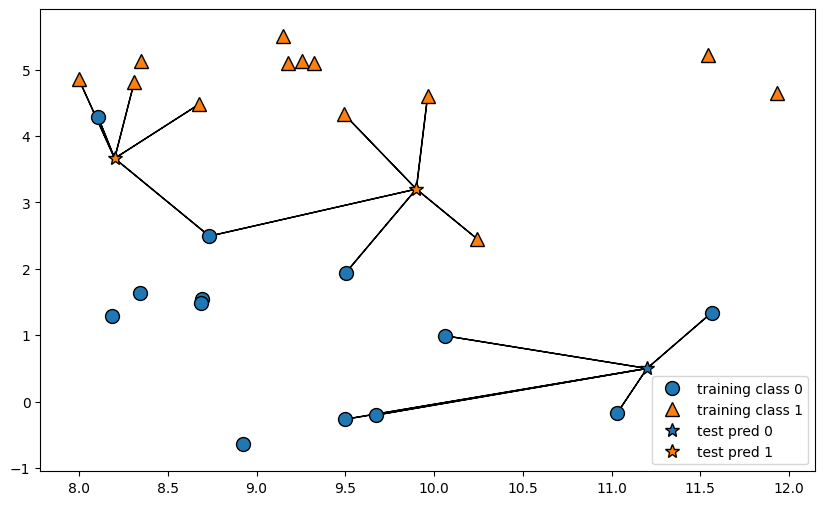

In [87]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [88]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [89]:
pd.DataFrame.from_dict(my_dict).sample(10)

Actual  Pred  Proba_1  Proba_0
817        0     0      0.2      0.8
315        1     1      1.0      0.0
707        0     1      0.8      0.2
2400       0     1      0.6      0.4
1966       1     1      1.0      0.0
1103       0     0      0.0      1.0
1967       1     1      1.0      0.0
598        1     1      1.0      0.0
1117       1     1      1.0      0.0
2566       0     0      0.0      1.0

In [90]:
# 4/5 => 4 out of 5 

In [91]:
df.iloc[1920] 


Gene One          6.4
Gene Two          4.7
Cancer Present    1.0
Name: 1920, dtype: float64

In [92]:
df.iloc[2958] 

# In this observation, it was 100% wrong by looking at the 5 nearest data points. We can understand why 
# it was wrong from the visual below.

Gene One          3.9
Gene Two          7.3
Cancer Present    1.0
Name: 2958, dtype: float64

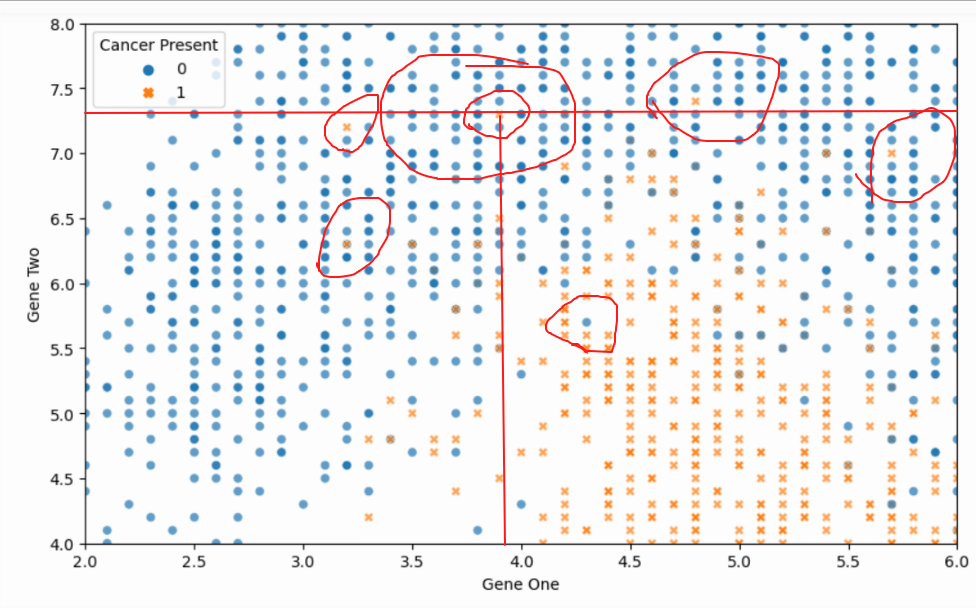

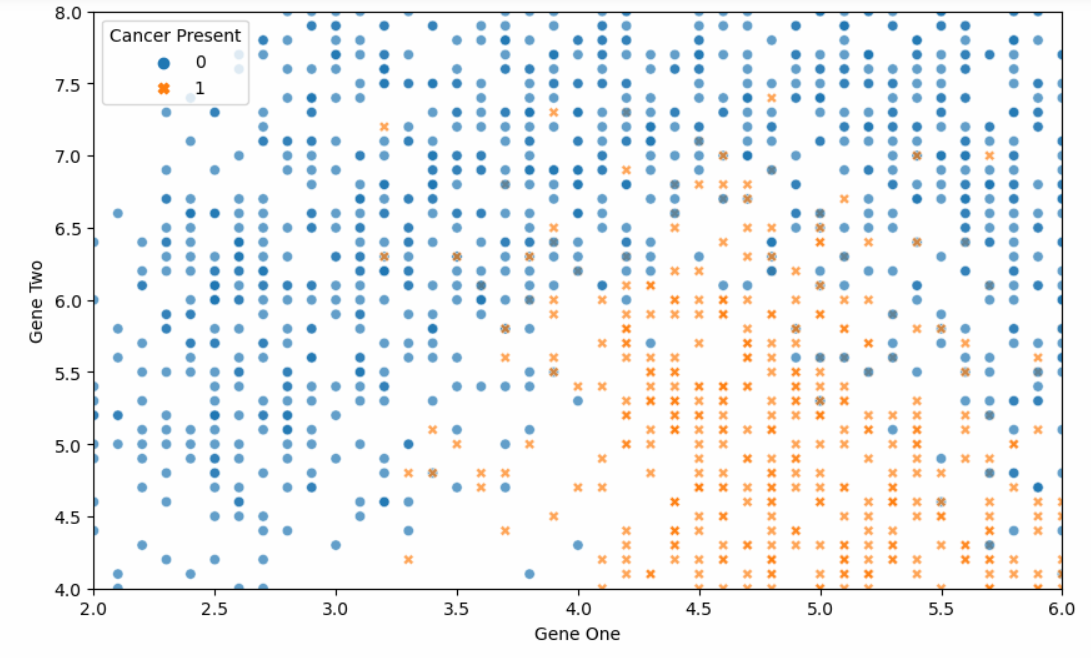

## Model Performance on Classification Tasks

In [93]:
confusion_matrix(y_test, y_pred)

array([[439,  31],
       [ 34, 396]])

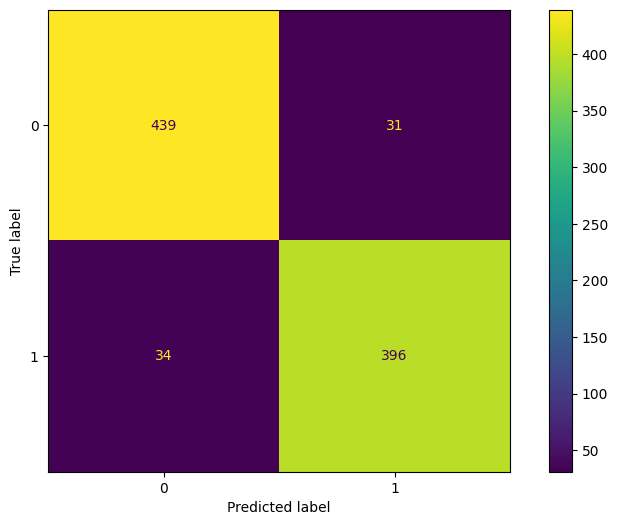

In [94]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);
# TN FP
# FN TP
# The positives and negatives assigned based on the predicted label 


In [95]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [96]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900


Train_Set
[[ 971   59]
 [  61 1009]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



## Elbow Method for Choosing Reasonable K Values

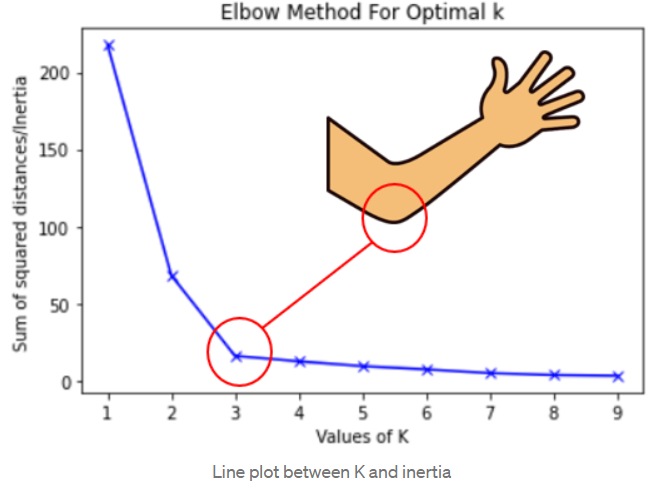

**Elbow Method**

The KNN Elbow Method is a technique used to determine the optimal k value in the k-Nearest Neighbors (KNN) algorithm. This method calculates training and validation errors for different k values and visualizes how the errors change. The goal is to find the point where the errors significantly decrease and then level off. This point is often referred to as the "elbow" and represents the optimal k value.

**How It Works:**
1. **Different k Values:** Select a range of k values (e.g., from 1 to 20).
2. **Error Calculation:** Train the model for each k value and calculate training and validation errors.
3. **Visualization:** Plot the errors (k-error graph). Look for a distinct elbow point in the graph.
4. **Elbow Point:** Identify the k value where the errors rapidly decrease and then stabilize.

**Advantages:**
- **Reducing Complexity:** Selecting the optimal k value can reduce the model's complexity and computational cost.
- **Improving Model Performance:** The correct k value can enhance the model's accuracy and overall performance.

**Disadvantages:**
- **Visual Interpretation:** Determining the elbow point requires visual interpretation and may not always be clearly identifiable.

In [97]:
test_error_rates = []

for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10)
    
    accuracy_mean = scores["test_accuracy"].mean() 
    
    test_error = 1 - accuracy_mean
    
    test_error_rates.append(test_error)

# To select the optimal K value, we can use accuracy if our dataset is balanced, or the recall metric of the 
# target class if it is unbalanced.

# For each number of neighbors (between 1 and 30), we first find the accuracy score and then subtract this score 
# from 1 to find the error score for each K value.

# Since finding the optimal K value on the test dataset (hold-out set) can cause a data leakage problem, 
# we will use our train dataset in cross-validation (CV) and decide based on the average error scores of the validation sets.

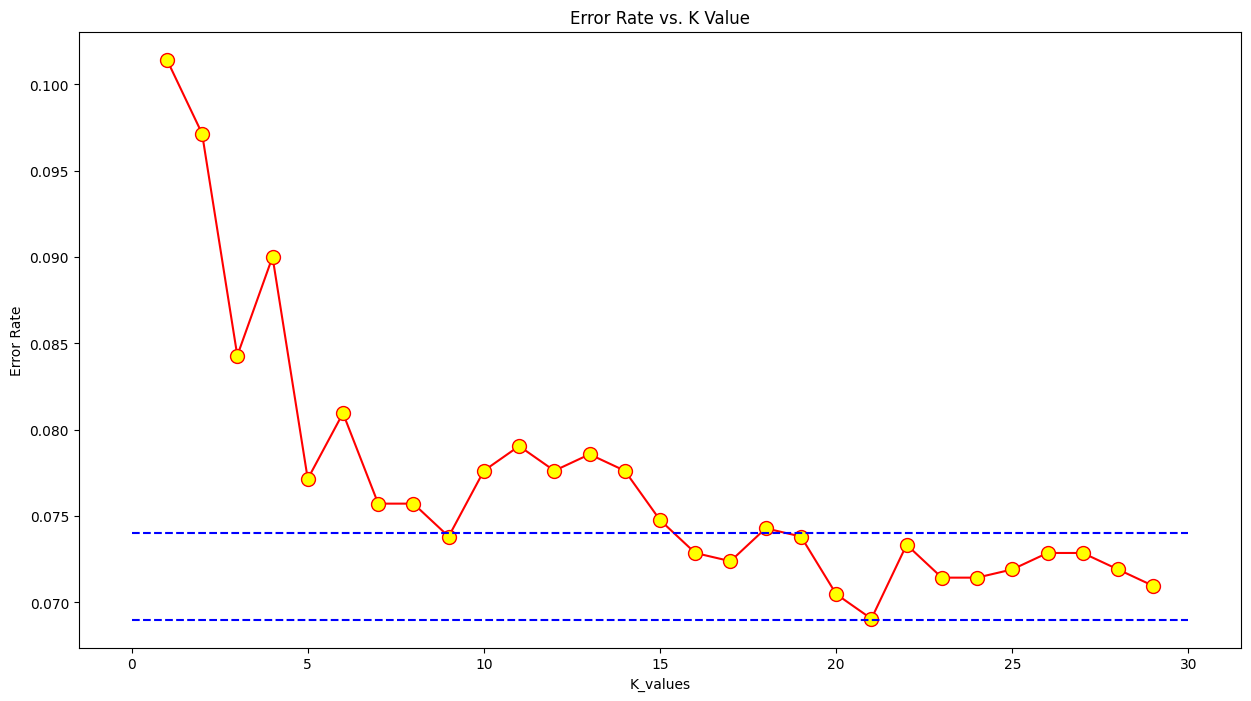

In [98]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 30),
         test_error_rates,
         color='red',
         marker='o',
         markerfacecolor='yellow',
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin=0, xmax=30, colors='b', linestyles="--")
plt.hlines(y=0.069, xmin=0, xmax=30, colors='b', linestyles="--")

# We visualize the error scores we found.

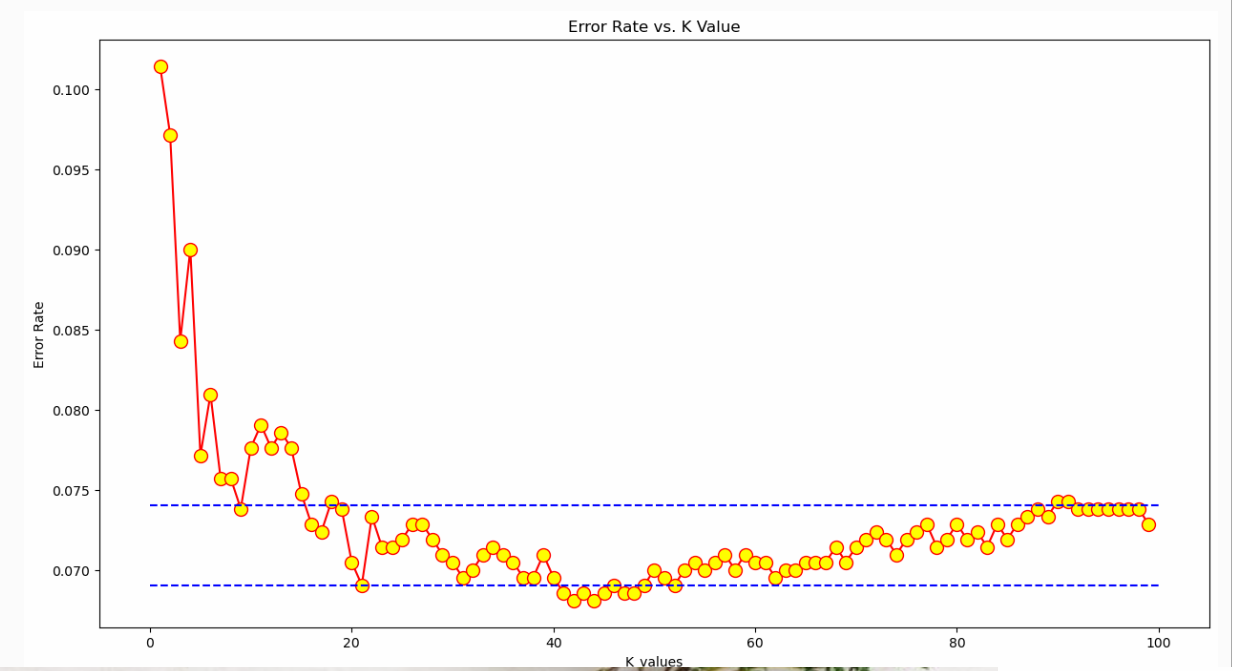

## Overfiting and underfiting control for k values

In [99]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    knn_pipe_model.fit(X_train,y_train) 
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10, return_train_score=True)
    
    accuracy_test_mean = scores["test_accuracy"].mean() 
    accuracy_train_mean = scores["train_accuracy"].mean() 

    
    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

# We compare the average error scores of the validation and train data obtained from the train dataset we provided 
# to CV, similar to what we did above.
# This way, we can more easily see if there is any overfitting.

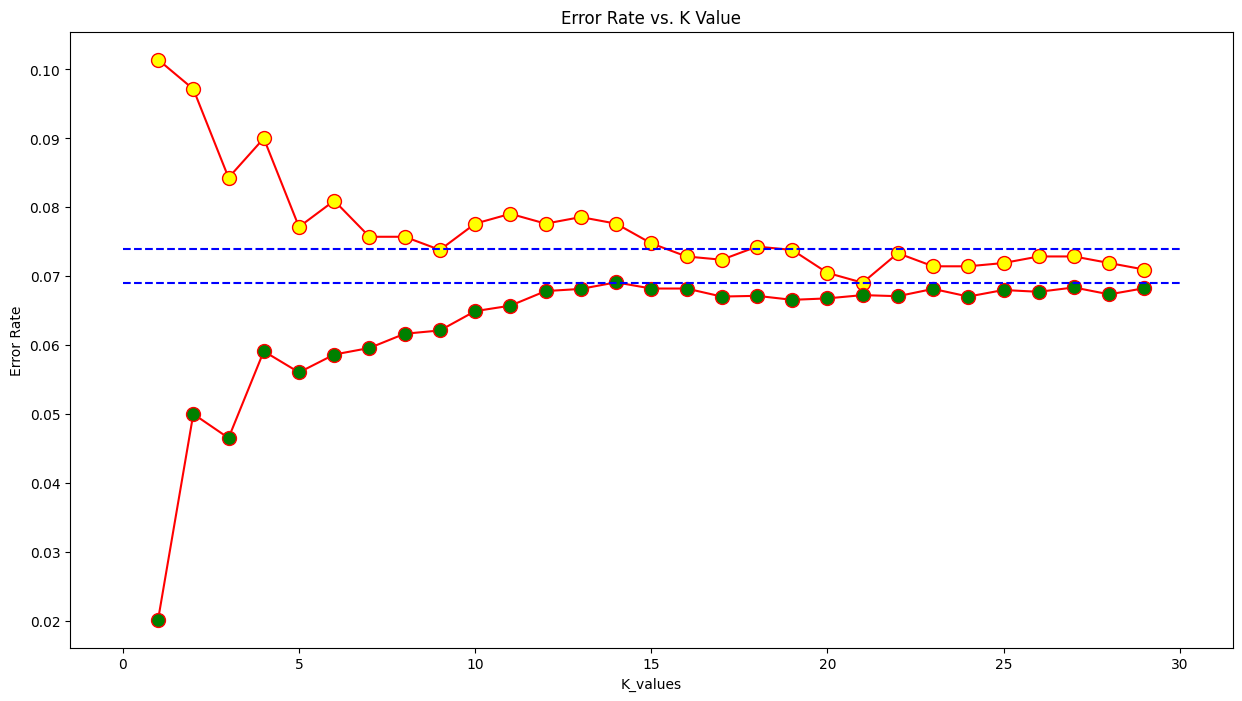

In [100]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='red', marker='o',
         markerfacecolor='yellow', markersize=10)

plt.plot(range(1,30), train_error_rates, color='red', marker='o',
         markerfacecolor='green', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.074, xmin = 0, xmax = 30, colors= 'b', linestyles="--")
plt.hlines(y=0.069, xmin = 0, xmax = 30, colors= 'b', linestyles="--")

# The yellow bars represent the scores for the validation data, and the green bars represent the scores for 
# the train data.

# For the validation data, the lowest error score is achieved at K=21. However, if we choose 21, 
# the complexity and computational cost of the model will increase significantly. For K=9, the error is 0.074, 
# while for K=21, the error is 0.069. Is it worth taking on this much complexity and cost for a difference of 0.005? 
# This is a question we need to consider.  
# It is not worth the cost for a difference of 0.005.

# At K=21, the scores are almost the same for both the validation and train data error scores. 
# However, at K=9, the error score for the validation data is 0.074, while the error score for the 
# train data is 0.060. The difference is 0.014. Since the difference is very small, we can comfortably choose K=9.

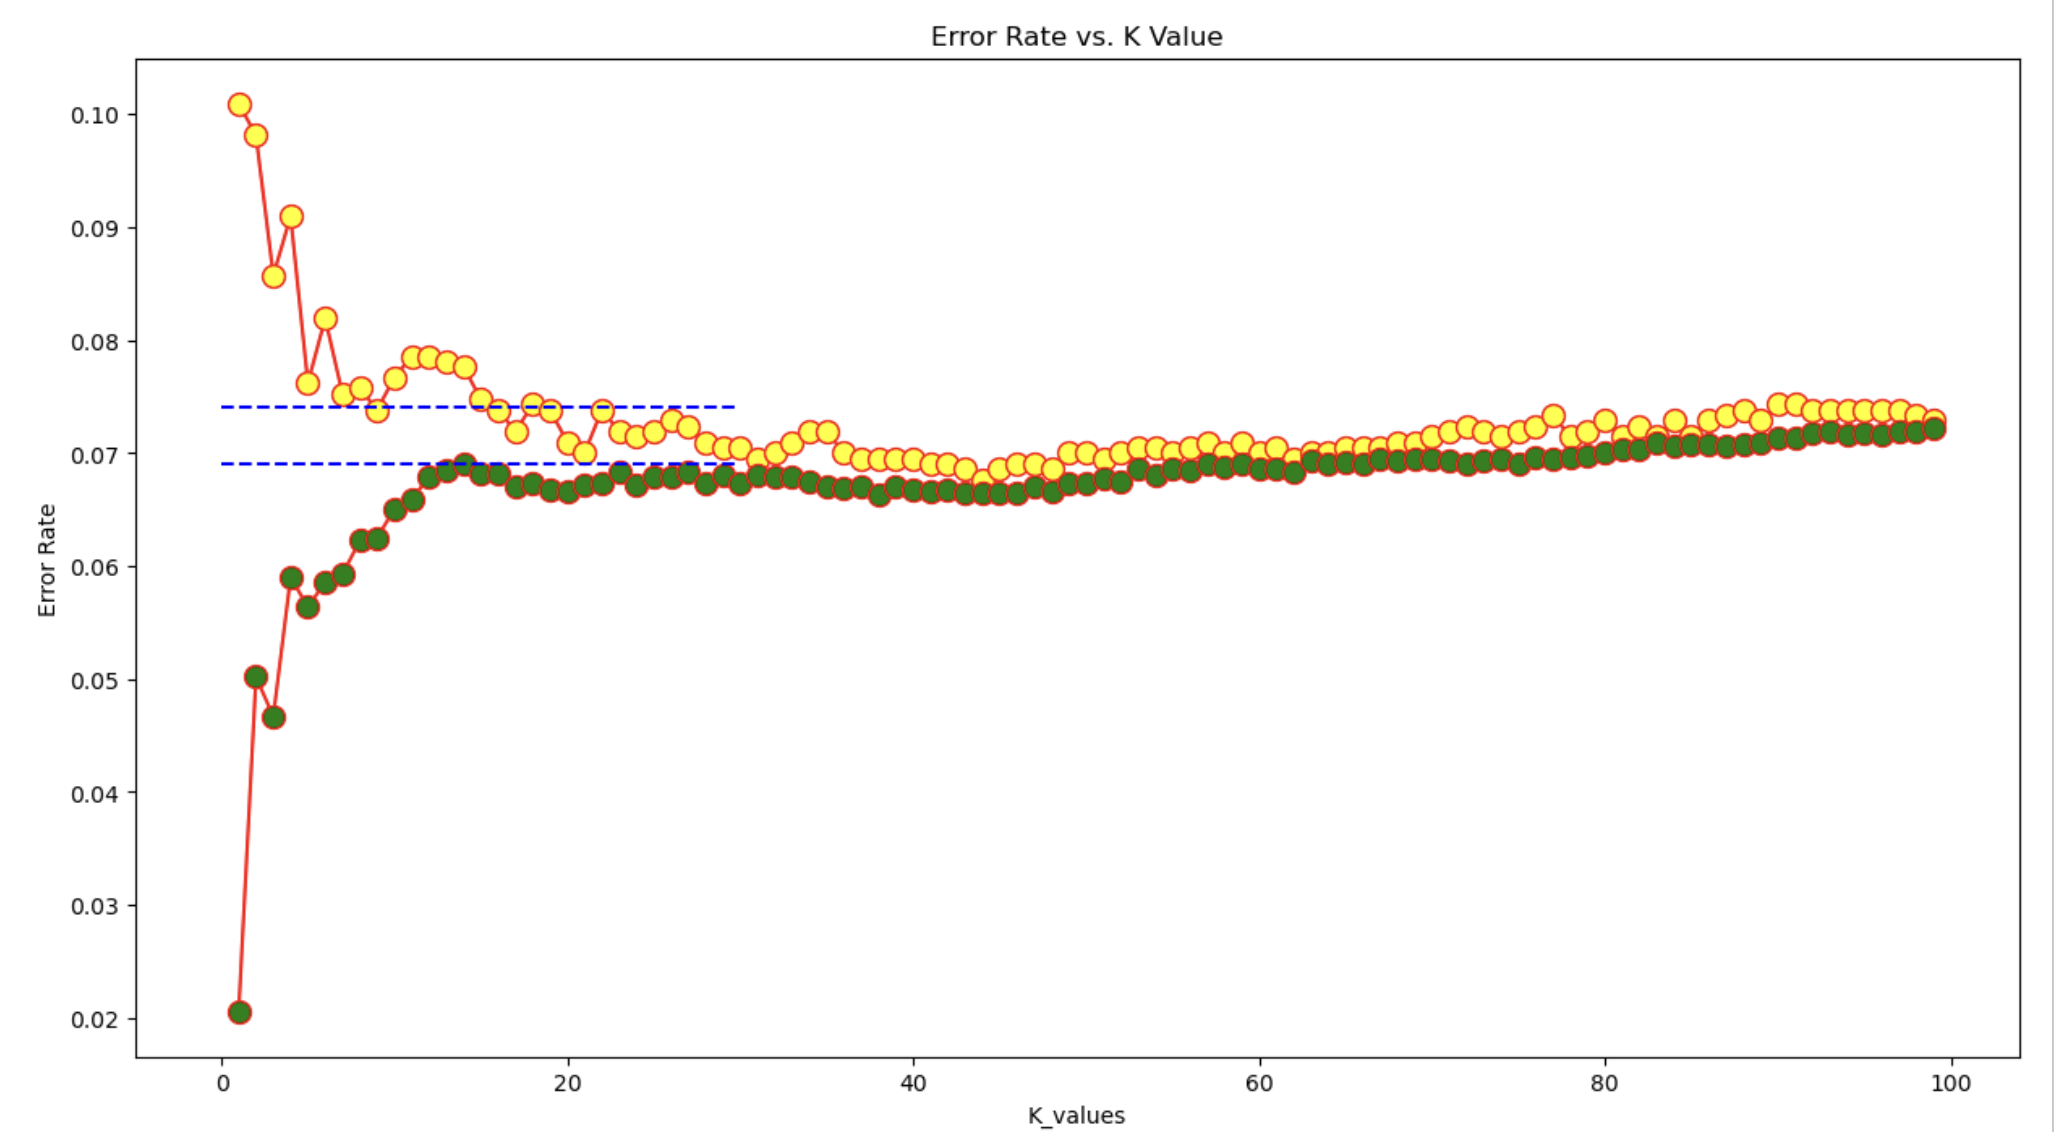

## Scores by Various K Values

In [101]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=1))]
knn1 = Pipeline(steps=operations)

knn1.fit(X_train, y_train)
print('WITH K=1\n')
eval_metric(knn1, X_train, y_train, X_test, y_test)

# Made a total of 89 errors.
# Even if the scores obtained above do not match exactly with the scores here, we expect them to be close.

WITH K=1

Test_Set
[[426  44]
 [ 45 385]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900


Train_Set
[[1003   27]
 [  21 1049]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1030
           1       0.97      0.98      0.98      1070

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



In [102]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=6))]
knn6 = Pipeline(steps=operations)

knn6.fit(X_train, y_train)
print('WITH K=6\n')
eval_metric(knn6, X_train, y_train, X_test, y_test) # 36 + 22 =58  hatalı tahmin

WITH K=6

Test_Set
[[448  22]
 [ 36 394]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.93      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set
[[980  50]
 [ 79 991]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1030
           1       0.95      0.93      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



In [108]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]
knn9 = Pipeline(steps=operations)

knn9.fit(X_train, y_train)
print('WITH K=9\n')
eval_metric(knn9, X_train, y_train, X_test, y_test) # 28 + 24=52 error predic

WITH K=9

Test_Set
[[446  24]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       470
           1       0.94      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set
[[ 961   69]
 [  60 1010]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1030
           1       0.94      0.94      0.94      1070

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



In [104]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=16))]
knn16 = Pipeline(steps=operations)

knn16.fit(X_train, y_train)
print('WITH K=16\n')
eval_metric(knn16, X_train, y_train, X_test, y_test) # 31 + 21 wrong predic

WITH K=16

Test_Set
[[449  21]
 [ 31 399]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set
[[960  70]
 [ 74 996]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.93      0.93      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [105]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=19))]
knn19 = Pipeline(steps=operations)

knn19.fit(X_train, y_train)
print('WITH K=19\n')
eval_metric(knn19, X_train, y_train, X_test, y_test) # 25 + 22=47 wrong prediction

WITH K=19

Test_Set
[[448  22]
 [ 25 405]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       470
           1       0.95      0.94      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set
[[ 959   71]
 [  70 1000]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.93      0.93      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [106]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=22))]
knn22 = Pipeline(steps=operations)

knn22.fit(X_train, y_train)
print('WITH K=21\n')
eval_metric(knn22, X_train, y_train, X_test, y_test) # 28 + 18=46 wrong prediction

WITH K=21

Test_Set
[[452  18]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.96      0.93      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set
[[ 960   70]
 [  68 1002]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



In [107]:
k_list = [3, 6, 9, 16, 21, 22, 23]
 
for i in k_list:
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=i))]
    knn = Pipeline(steps=operations)
    knn.fit(X_train, y_train)
    print(f'WITH K={i}\n')
    eval_metric(knn, X_train, y_train, X_test, y_test)

WITH K=3

Test_Set
[[437  33]
 [ 33 397]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.92      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900


Train_Set
[[ 979   51]
 [  46 1024]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1030
           1       0.95      0.96      0.95      1070

    accuracy                           0.95      2100
   macro avg       0.95      0.95      0.95      2100
weighted avg       0.95      0.95      0.95      2100

WITH K=6

Test_Set
[[448  22]
 [ 36 394]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   mac

## Cross Validate For Optimal K Value

In [109]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1   0.008029    0.018940       0.923810        0.937037        0.933333   
2   0.010701    0.022318       0.942857        0.937037        0.935780   
3   0.004631    0.013717       0.947619        0.935450        0.970588   
4   0.004362    0.013863       0.866667        0.943386        0.876190   
5   0.006475    0.010882       0.923810        0.936508        0.909910   
6   0.006122    0.012444       0.914286        0.940212        0.923810   
7   0.003840    0.012038       0.942857        0.936508        0.927928   
8   0.004085    0.012693       0.938095        0.936508        0.927273   
9   0.003937    0.014076       0.966667        0.935979        0.980769   
10  0.004058    0.011864       0.895238        0.940212        0.869565   

    train_precision  test_recall  train_recall   test_f1  train_f1  
1          0.936853     0.915888      0.939772  0.924528  0.938310  
2          0.932377     0.953271      0.944964  0.944444  0.938628  
3          0.932169     0.925234      0.941848  0.947368  0.936983  
4          0.941237     0.859813      0.948079  0.867925  0.944646  
5          0.933196     0.943925      0.942887  0.926606  0.938017  
6          0.940871     0.906542      0.941848  0.915094  0.941360  
7          0.935884     0.962617      0.939772  0.944954  0.937824  
8          0.934089     0.953271      0.941848  0.940092  0.937952  
9          0.938542     0.953271      0.935618  0.966825  0.937077  
10         0.940871     0.934579      0.941848  0.900901  0.941360

In [110]:
df_scores.mean()[2:]

test_accuracy      0.926190
train_accuracy     0.937884
test_precision     0.925515
train_precision    0.936609
test_recall        0.930841
train_recall       0.941848
test_f1            0.927874
train_f1           0.939216
dtype: float64

## Gridsearch Method for Choosing Reasonable K Values

**Hyperparameters of the K-Nearest Neighbors (KNN) Algorithm**

The KNN algorithm can be configured with a set of parameters. These parameters can affect the performance and accuracy of the model.

**Explanation of Hyperparameters**

1. **n_neighbors**:
   - **Number of neighbors (K)**.
   - Determines the number of neighbors used to classify or predict a new data point.
   - Setting an appropriate value can impact the success of the model.
   - Typically, a small and odd value is preferred.

2. **weights**:
   - **Method for weighting neighbors' contributions**.
   - **"uniform"**: Each neighbor has equal weight.
   - **"distance"**: Weights are proportional to the inverse of their distance.

3. **algorithm**:
   - **Method to compute the nearest neighbors**.
   - Options: **"auto"**, **"ball_tree"**, **"kd_tree"**, **"brute"**.
   - **"auto"**: Automatically selects the best algorithm based on the dataset.
   - **"ball_tree"** and **"kd_tree"**: Fast neighbor search.
   - **"brute"**: Performs exhaustive search by comparing all points.

4. **leaf_size**:
   - **Leaf size in "ball_tree" or "kd_tree" algorithms**.
   - Larger leaf size may reduce memory usage but can slow down the search.

5. **p**:
   - **Type of distance metric**.
   - **p = 1**: Manhattan distance.
   - **p = 2**: Euclidean distance.
   - The Minkowski distance is a general form that includes both metrics.

6. **metric**:
   - **Defines the distance metric**.
   - Default is **"minkowski"**, which represents Manhattan or Euclidean distance based on **p**.
   - Other options: **"manhattan"**, **"euclidean"**, **"cosine"**, etc.

7. **metric_params**:
   - **Additional parameters for the distance metric**.
   - For example, the covariance matrix for Mahalanobis distance.

8. **n_jobs**:
   - **Number of parallel jobs to run**.
   - **n_jobs = -1**: Uses all processor cores.

These parameters can be fine-tuned to optimize the performance of the KNN algorithm for specific datasets and tasks.

In [111]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

knn_model = Pipeline(steps=operations)

In [113]:
knn_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [114]:
k_values = range(1,30)

In [ ]:
param_grid = [
    {
        "knn__n_neighbors": range(1, 30),
        "knn__metric": ['euclidean', 'manhattan'],#if euclidean gives best result it gonna continue with it, if manhattan ..
        "knn__weights": ['uniform', 'distance']
    },
    {
        "knn__n_neighbors": range(1, 30),
        "knn__metric": ['minkowski'],# if you want to use the combination of euclidean and manhattan. 
        "knn__p": [1, 2],
        "knn__weights": ['uniform', 'distance']
    }
]

From a purely logical and functional standpoint, using only the `minkowski` metric with the corresponding values of `p` (`p=1` for Manhattan and `p=2` for Euclidean) would cover all the cases of `euclidean` and `manhattan` explicitly. Here's why this approach could be considered:

### Pros of Using Only the `minkowski` Part:
1. **Reduces Redundancy**: By using only `minkowski` with `p=1` and `p=2`, you eliminate the need to specify `euclidean` and `manhattan` separately, as they are just special cases of `minkowski`.
  
2. **Simplifies the Grid**: The `param_grid` becomes simpler and more compact, which could make it easier to manage and understand.

3. **Flexibility**: You still retain the flexibility to explore other values of `p` that aren't simply 1 or 2, potentially discovering other effective distance measures for your model.

4. **Consistency**: It keeps the parameter grid consistent by always using `minkowski`, which might be easier to maintain in the long run.

### Why You Might Still Include `euclidean` and `manhattan` Explicitly:
1. **Implementation Optimizations**: Some KNN implementations might have specific optimizations for `euclidean` or `manhattan` when they are explicitly defined. For instance, there might be pre-computed tables or faster computation paths for these common cases. If the implementation you are using has such optimizations, it might be faster or more efficient to specify them directly.

2. **Clarity**: For someone reading the code, having `euclidean` and `manhattan` explicitly listed might be more intuitive. It clearly shows that these specific, well-known distance metrics are being tested, which might be preferable for readability and understanding.

### Conclusion:
If your primary concern is to reduce redundancy and simplify the parameter grid without losing any functionality, it is indeed logical to use only the `minkowski` metric with the appropriate `p` values. However, if you suspect that the implementation you are using may have optimizations for the explicitly defined `euclidean` and `manhattan` metrics, or if you prioritize clarity in the code for those who might not be familiar with the generality of `minkowski`, including them separately might still be justified. 

In practice, many prefer the more streamlined `minkowski`-only approach unless specific reasons necessitate keeping the others.

In [116]:
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=5, scoring="accuracy", return_train_score=True)

In [117]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__metric': ['euclidean', 'manhattan'],
                          'knn__n_neighbors': range(1, 30),
                          'knn__weights': ['uniform', 'distance']},
                         {'knn__metric': ['minkowski'],
                          'knn__n_neighbors': range(1, 30), 'knn__p': [1, 2],
                          'knn__weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [118]:
knn_grid_model.best_params_

{'knn__metric': 'euclidean', 'knn__n_neighbors': 20, 'knn__weights': 'uniform'}

In [119]:
knn_grid_model.best_estimator_

# `best_estimator` only returns values that are different from the defaults
# Since `metric=minkowski` and `p=2` are default values, it actually behaves as Euclidean by default

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=20))])

In [120]:
knn_grid_model.best_index_

np.int64(38)

In [121]:
pd.DataFrame(knn_grid_model.cv_results_).loc[38, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.930952
mean_train_score    0.933571
Name: 38, dtype: object

In [122]:
knn_grid_model.best_score_

np.float64(0.930952380952381)

In [123]:
print('WITH K=20\n')
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)  # total 48 errors made

WITH K=20

Test_Set
[[451  19]
 [ 29 401]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set
[[964  66]
 [ 73 997]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1030
           1       0.94      0.93      0.93      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



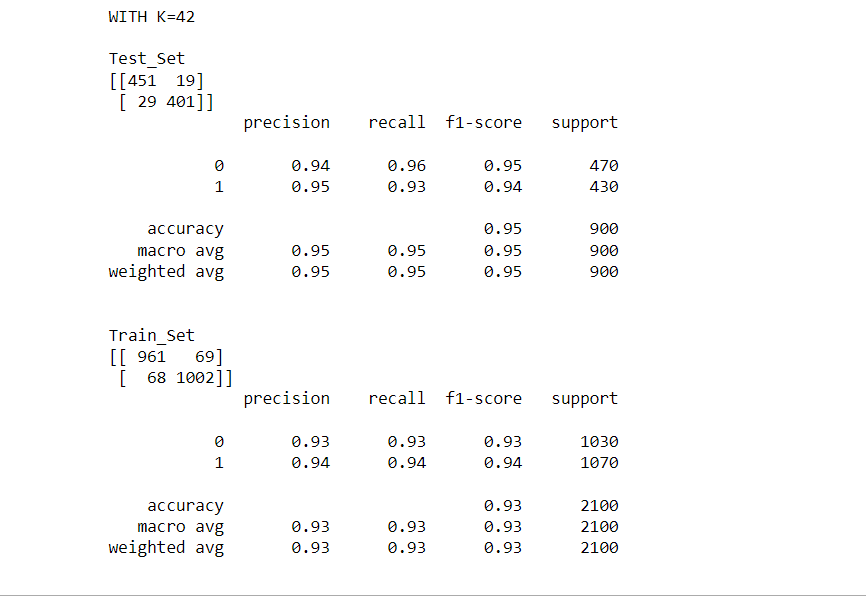

## Evaluating ROC Curves and AUC

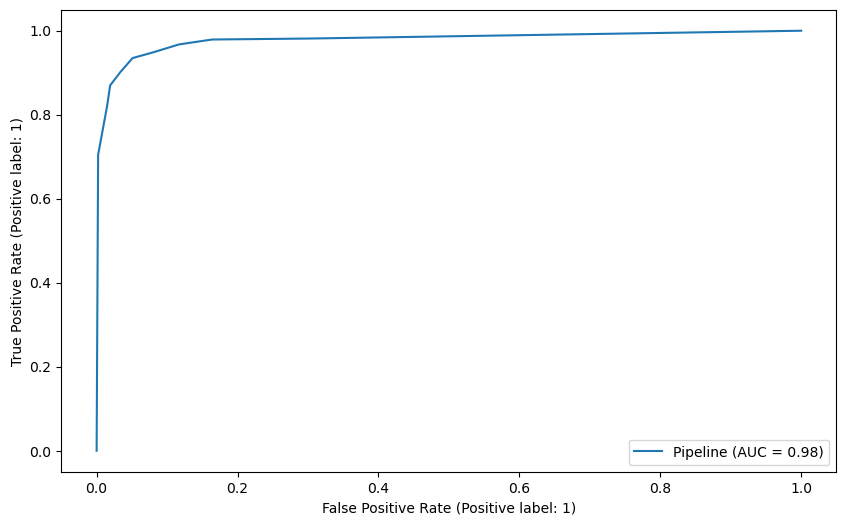

In [53]:
RocCurveDisplay.from_estimator(knn9, X_test, y_test);

In [54]:
y_pred_proba = knn9.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9781296387926769

# Final Model and Model Deployment

In [55]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=9))]

final_model = Pipeline(steps=operations)

final_model.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [56]:
import pickle

In [57]:
pickle.dump(final_model, open("knn_final_model", "wb"))

## Predict New Observations

In [58]:
loaded_model = pickle.load(open("knn_final_model", "rb"))

In [59]:
X.describe().T

count      mean       std  min  25%  50%  75%   max
Gene One  3000.0  5.600133  1.828388  1.0  4.3  5.6  6.9  10.0
Gene Two  3000.0  5.410467  1.729081  1.0  4.0  5.4  6.7  10.0

In [60]:
new_obs = {"Gene One": [1.1, 3.2, 4.1, 5.7, 7.2, 9.3, 2.1, 6.1],
           "Gene Two": [1.2, 4.1, 4.2, 5.4, 6.8, 10.2, 7.9, 1.1]
          }

In [61]:
samples= pd.DataFrame(new_obs)
samples

Gene One  Gene Two
0       1.1       1.2
1       3.2       4.1
2       4.1       4.2
3       5.7       5.4
4       7.2       6.8
5       9.3      10.2
6       2.1       7.9
7       6.1       1.1

In [62]:
predictions = loaded_model.predict(samples)
predictions_proba = loaded_model.predict_proba(samples)

In [63]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

Gene One  Gene Two  pred  pred_proba_1  pred_proba_0
0       1.1       1.2     0      0.000000      1.000000
1       3.2       4.1     0      0.111111      0.888889
2       4.1       4.2     1      0.888889      0.111111
3       5.7       5.4     0      0.111111      0.888889
4       7.2       6.8     0      0.000000      1.000000
5       9.3      10.2     1      0.555556      0.444444
6       2.1       7.9     0      0.000000      1.000000
7       6.1       1.1     1      1.000000      0.000000

**Questions for LOGISTIC Regression**

1. Instructor, when we did vanilla modeling and cross-validation, we got low scores around 0.55, like yesterday. Will we proceed to the grid search stage again, as we did yesterday? After all, we couldn’t reach 0.85 or 0.90 scores in grid search; wasn’t this predictable? Especially for much larger datasets, couldn’t we check the vanilla states and cross-validations of all models, and apply grid search improvements only to the models that already provide scores around 0.70 and not waste time with those giving scores around 0.4-0.5 in their vanilla states?

2. In relation to the above question, if we have to do a grid search for each model, is it necessary to perform cross-validation before the grid search?

3. We said in cross-validation, scores are calculated based on the default 1 value. In multinomial logistic regression cross-validation, which class does it base on for the default 1 value?

4. Again, in yesterday's notebook, we split the train-test according to the current class ratios using the `stratified=y` parameter, and we ensured that the folds were balanced in terms of classes using the `stratifiedKFold` parameter we used for CV in GridSearch. What else does the class-weight parameter we used in Grid Search help balance? We didn’t understand that part, so we couldn’t just blindly say we should use it.

5. Also, yesterday we tried to find the optimal threshold. When we decide on the optimal threshold, we did not learn how to embed it into the final model. We managed to include the optimal threshold in the prediction stage through an `if` code block after calling the model we deployed with pickle. Ultimately, when we hand this model over to a backend developer, they will need to use the predictions made by this model subjected to the same `if` block; how will we solve this issue?


**Answers**

1. Yes, if the vanilla model shows poor performance, we might think that improving this model with grid search may not be very beneficial. Generally, a more efficient strategy is to look at the performance of vanilla models, select those that give good results, and apply grid search only to them. However, this approach may not always be correct; in some cases, the performance of the vanilla model can be significantly improved with grid search. But here's the thing, we did this application on a single model in class. In real life, we will continue with models where we get high scores in the vanilla model. In fact, I mentioned a method called lazy predict, where we can get scores from 20-30 algorithms at once and plan based on those scores.

2. As I said in class, if you remember; "We won’t do most of the processes we're doing now later on." Yes, there is no need to do it separately because grid search already includes cross-validation, but if you are curious about the performance of the vanilla model, you should do it.

3. In binary, yes, we said it calculates for the default 1 (positive class), and if we want to calculate for 0 (negative class), we use the `pos_label` parameter. But in multiclass problems, things get a bit different. Calculating metrics like precision, recall, and F1-score becomes more complex because there are multiple classes. We also did an example in class, if you remember. We said we don’t use precision, recall, and F1 metrics alone for multiclass data in CV or gridsearchCV. We should write precision_weighted, precision_macro, precision_micro, etc. Otherwise, we get an error. If we want to see the CV scores for a specific class, we should use the `make_scorer` function.

4. `stratified=y` balances class distribution in the train-test split, i.e., in the training and test datasets. StratifiedKFold ensures class balance across cross-validation folds. Class-weight, on the other hand, gives more weight to minority classes during the model training process, ensuring that minority classes are correctly predicted in imbalanced datasets. How does it do that? The class-weight parameter assigns higher weights to minority classes and lower weights to majority classes based on their counts. During the training process, the error function is updated considering these weights, giving more importance to minority class errors. Wrong predictions in minority classes create a bigger penalty, which helps the model learn these classes more accurately. The model learns all classes in a balanced way, increasing the likelihood of correctly predicting minority classes. When used together, class distribution is balanced in both training and test sets, and class imbalance is compensated for during the model learning process.

5. There are actually a few methods for this. You can retrain the model using the optimal threshold. For example, say `y_train_new = model.predict_proba(X_train)[:, 1] >= optimal_threshold` and train the final model as `final_model.fit(X_train, y_train_new)`. Or you can create a custom class that includes the threshold value when saving your model with pickle. These are actually more advanced parts of the job; if I explained these in class, it would have been quite overwhelming :slightly_smiling_face: You haven't seen the class structure yet because. In conclusion, there are a few methods to integrate the optimal threshold value into the model and ensure that the backend developer uses it in the same way. But I also congratulate you; you've solved this in a different way :clap:

### <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Thank you in the hope that it will be useful</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>If you want to be the first to be informed about updates, please do not forget to follow us. </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |